# pyCisTopic scATAC visualisation

In [1]:
import pycisTopic
import pandas as pd
import os
import matplotlib.pyplot as plt
pycisTopic.__version__

'2.0a0'

# Get cistopic object

In [2]:
import pickle
file_path = "/staging/leuven/stg_00096/home/projects/2023_Cools_B-ALL/atac/outs/cistopic_obj.pkl"
with open(file_path, 'rb') as file:
    cistopic_obj = pickle.load(file)

print(cistopic_obj)

/opt/venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-05-01 16:09:52,604	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


CistopicObject from project cisTopic_merge with n_cells × n_regions = 11327 × 224360


In [3]:
cistopic_obj.cell_data['sample_id'].value_counts() 

Q1    5310
D0    2398
Q3    2240
Q2    1379
Name: sample_id, dtype: int64

In [27]:
cistopic_obj.cell_data['cell_type_all'] = cistopic_obj.cell_data['cell_type_all'].replace('Pro-B', 'Tumour', regex= True)

In [43]:
cistopic_obj.cell_data['cell_type_all'].value_counts()

Tumour_cells_Q1              5062
Tumour_cells_D0              2030
Tumour_cells_Q3              1778
Tumour_cells_Q2               964
Tcm_Naive_helper_T_cells      412
CD16pos_NK_cells              361
Tem_Trm_cytotoxic_T_cells     278
Classical_monocytes           192
Naive_B_cells                 135
Non-classical_monocytes        88
Mid_erythroid                  27
Name: cell_type_all, dtype: int64

In [28]:
cistopic_obj.cell_data['cell_type'] = cistopic_obj.cell_data['cell_type'].replace('Pro-B', 'Tumour', regex= True)

In [29]:
color_dict_ct = { "Naive_B_cells" : "#D2AF81FF",  
  "CD16pos_NK_cells":"#a25cce",
  "Classical_monocytes":"#94ca76", 
  "Mid_erythroid" : "#daa0fd", 
  "Non-classical_monocytes" : "#357711", 
  "Tcm_Naive_helper_T_cells":"#4acabd", 
  "Tem_Trm_cytotoxic_T_cells":"#0f517e",
  "Tumour_cells_D0":"#FFA500", 
  "Tumour_cells_Q1":"#FF6347", 
  "Tumour_cells_Q2":"#DC143C",
  "Tumour_cells_Q3": "#800101"}

In [30]:
model = cistopic_obj.selected_model
cell_topic =  model.cell_topic
cell_topic

CTCACCACACTAATCC-D0___D0  GTCTAGCTCCAGGATG-D0___D0  \
Topic1                   0.027516                  0.303958   
Topic2                   0.010051                  0.048295   
Topic3                   0.127079                  0.003236   
Topic4                   0.075780                  0.381877   
Topic5                   0.085234                  0.005975   
Topic6                   0.056225                  0.006472   
Topic7                   0.028710                  0.001992   
Topic8                   0.001791                  0.001494   
Topic9                   0.003118                  0.129948   
Topic10                  0.030999                  0.004979   
Topic11                  0.002637                  0.002738   
Topic12                  0.002869                  0.003236   
Topic13                  0.004694                  0.002987   
Topic14                  0.034017                  0.006970   
Topic15                  0.079346                  0.001494   
Topic16                  0.060803                  0.004730   
Topic17                  0.059062                  0.005975   
Topic18                  0.003433                  0.002489   
Topic19                  0.008177                  0.016430   
Topic20                  0.071534                  0.019666   
Topic21                  0.017664                  0.025143   
Topic22                  0.007397                  0.002987   
Topic23                  0.096612                  0.001743   
Topic24                  0.072960                  0.003485   
Topic25                  0.032292                  0.011700   

         CTAATGTTCTTTGGGC-D0___D0  CTAGGATAGTGGCTTC-D0___D0  \
Topic1                   0.053773                  0.011436   
Topic2                   0.004739                  0.032630   
Topic3                   0.092605                  0.125157   
Topic4                   0.017869                  0.037330   
Topic5                   0.070260                  0.101190   
Topic6                   0.051733                  0.052226   
Topic7                   0.039392                  0.026714   
Topic8                   0.000461                  0.004767   
Topic9                   0.008523                  0.003816   
Topic10                  0.024747                  0.040896   
Topic11                  0.000099                  0.005955   
Topic12                  0.001843                  0.029130   
Topic13                  0.006713                  0.006880   
Topic14                  0.091322                  0.017840   
Topic15                  0.049232                  0.089992   
Topic16                  0.064600                  0.086928   
Topic17                  0.084773                  0.042678   
Topic18                  0.004739                  0.009072   
Topic19                  0.007964                  0.011237   
Topic20                  0.111166                  0.058815   
Topic21                  0.080923                  0.007712   
Topic22                  0.014217                  0.004397   
Topic23                  0.085267                  0.090124   
Topic24                  0.023596                  0.086545   
Topic25                  0.009445                  0.016533   

         TCCTCAAAGGCCTAAG-D0___D0  CTCTCAGCAGGTTCTT-D0___D0  \
Topic1                   0.047936                  0.250364   
Topic2                   0.011017                  0.373569   
Topic3                   0.113033                  0.003538   
Topic4                   0.019142                  0.013111   
Topic5                   0.079551                  0.013736   
Topic6                   0.057427                  0.024142   
Topic7                   0.037647                  0.005411   
Topic8                   0.003551                  0.002289   
Topic9                   0.004575                  0.156087   
Topic10                  0.017640                  0.005619   
Topic11                  0.002936     

# Topic binarization

In [31]:
from pycisTopic.topic_binarization import binarize_topics

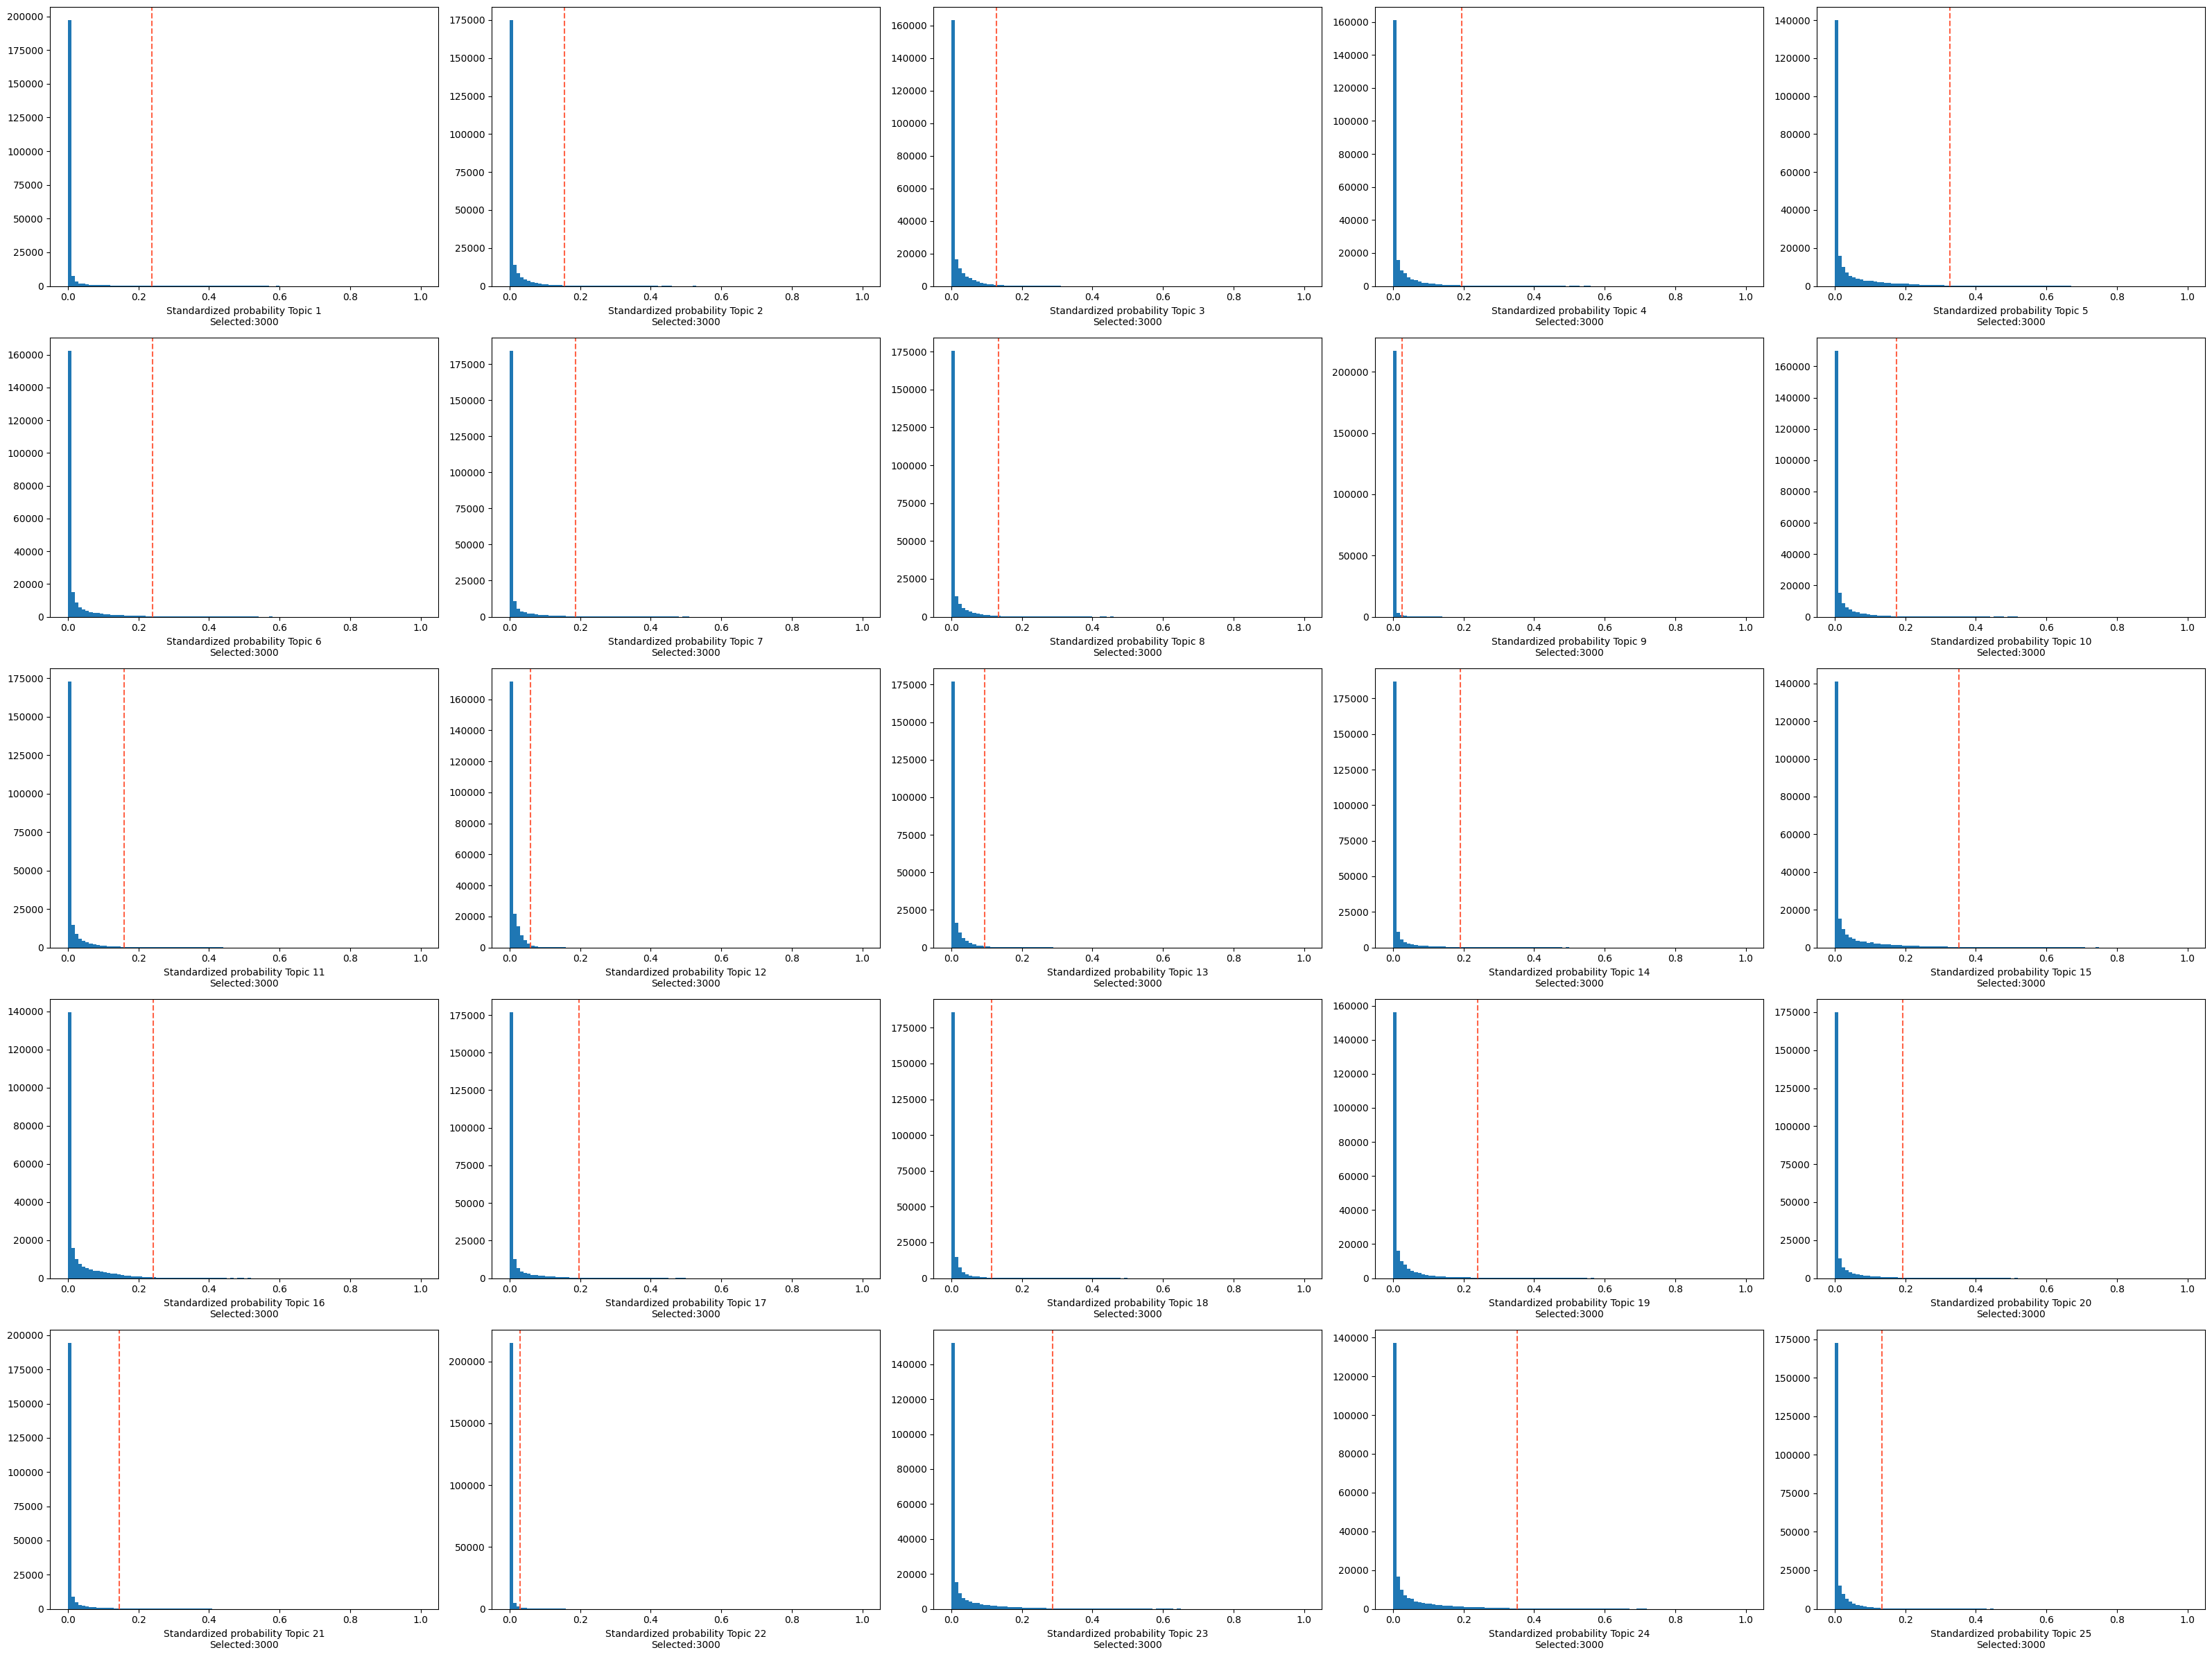

In [32]:
region_bin_topics_top_3k = binarize_topics(
    cistopic_obj, method='ntop', ntop = 3_000,
    plot=True, num_columns=5
)

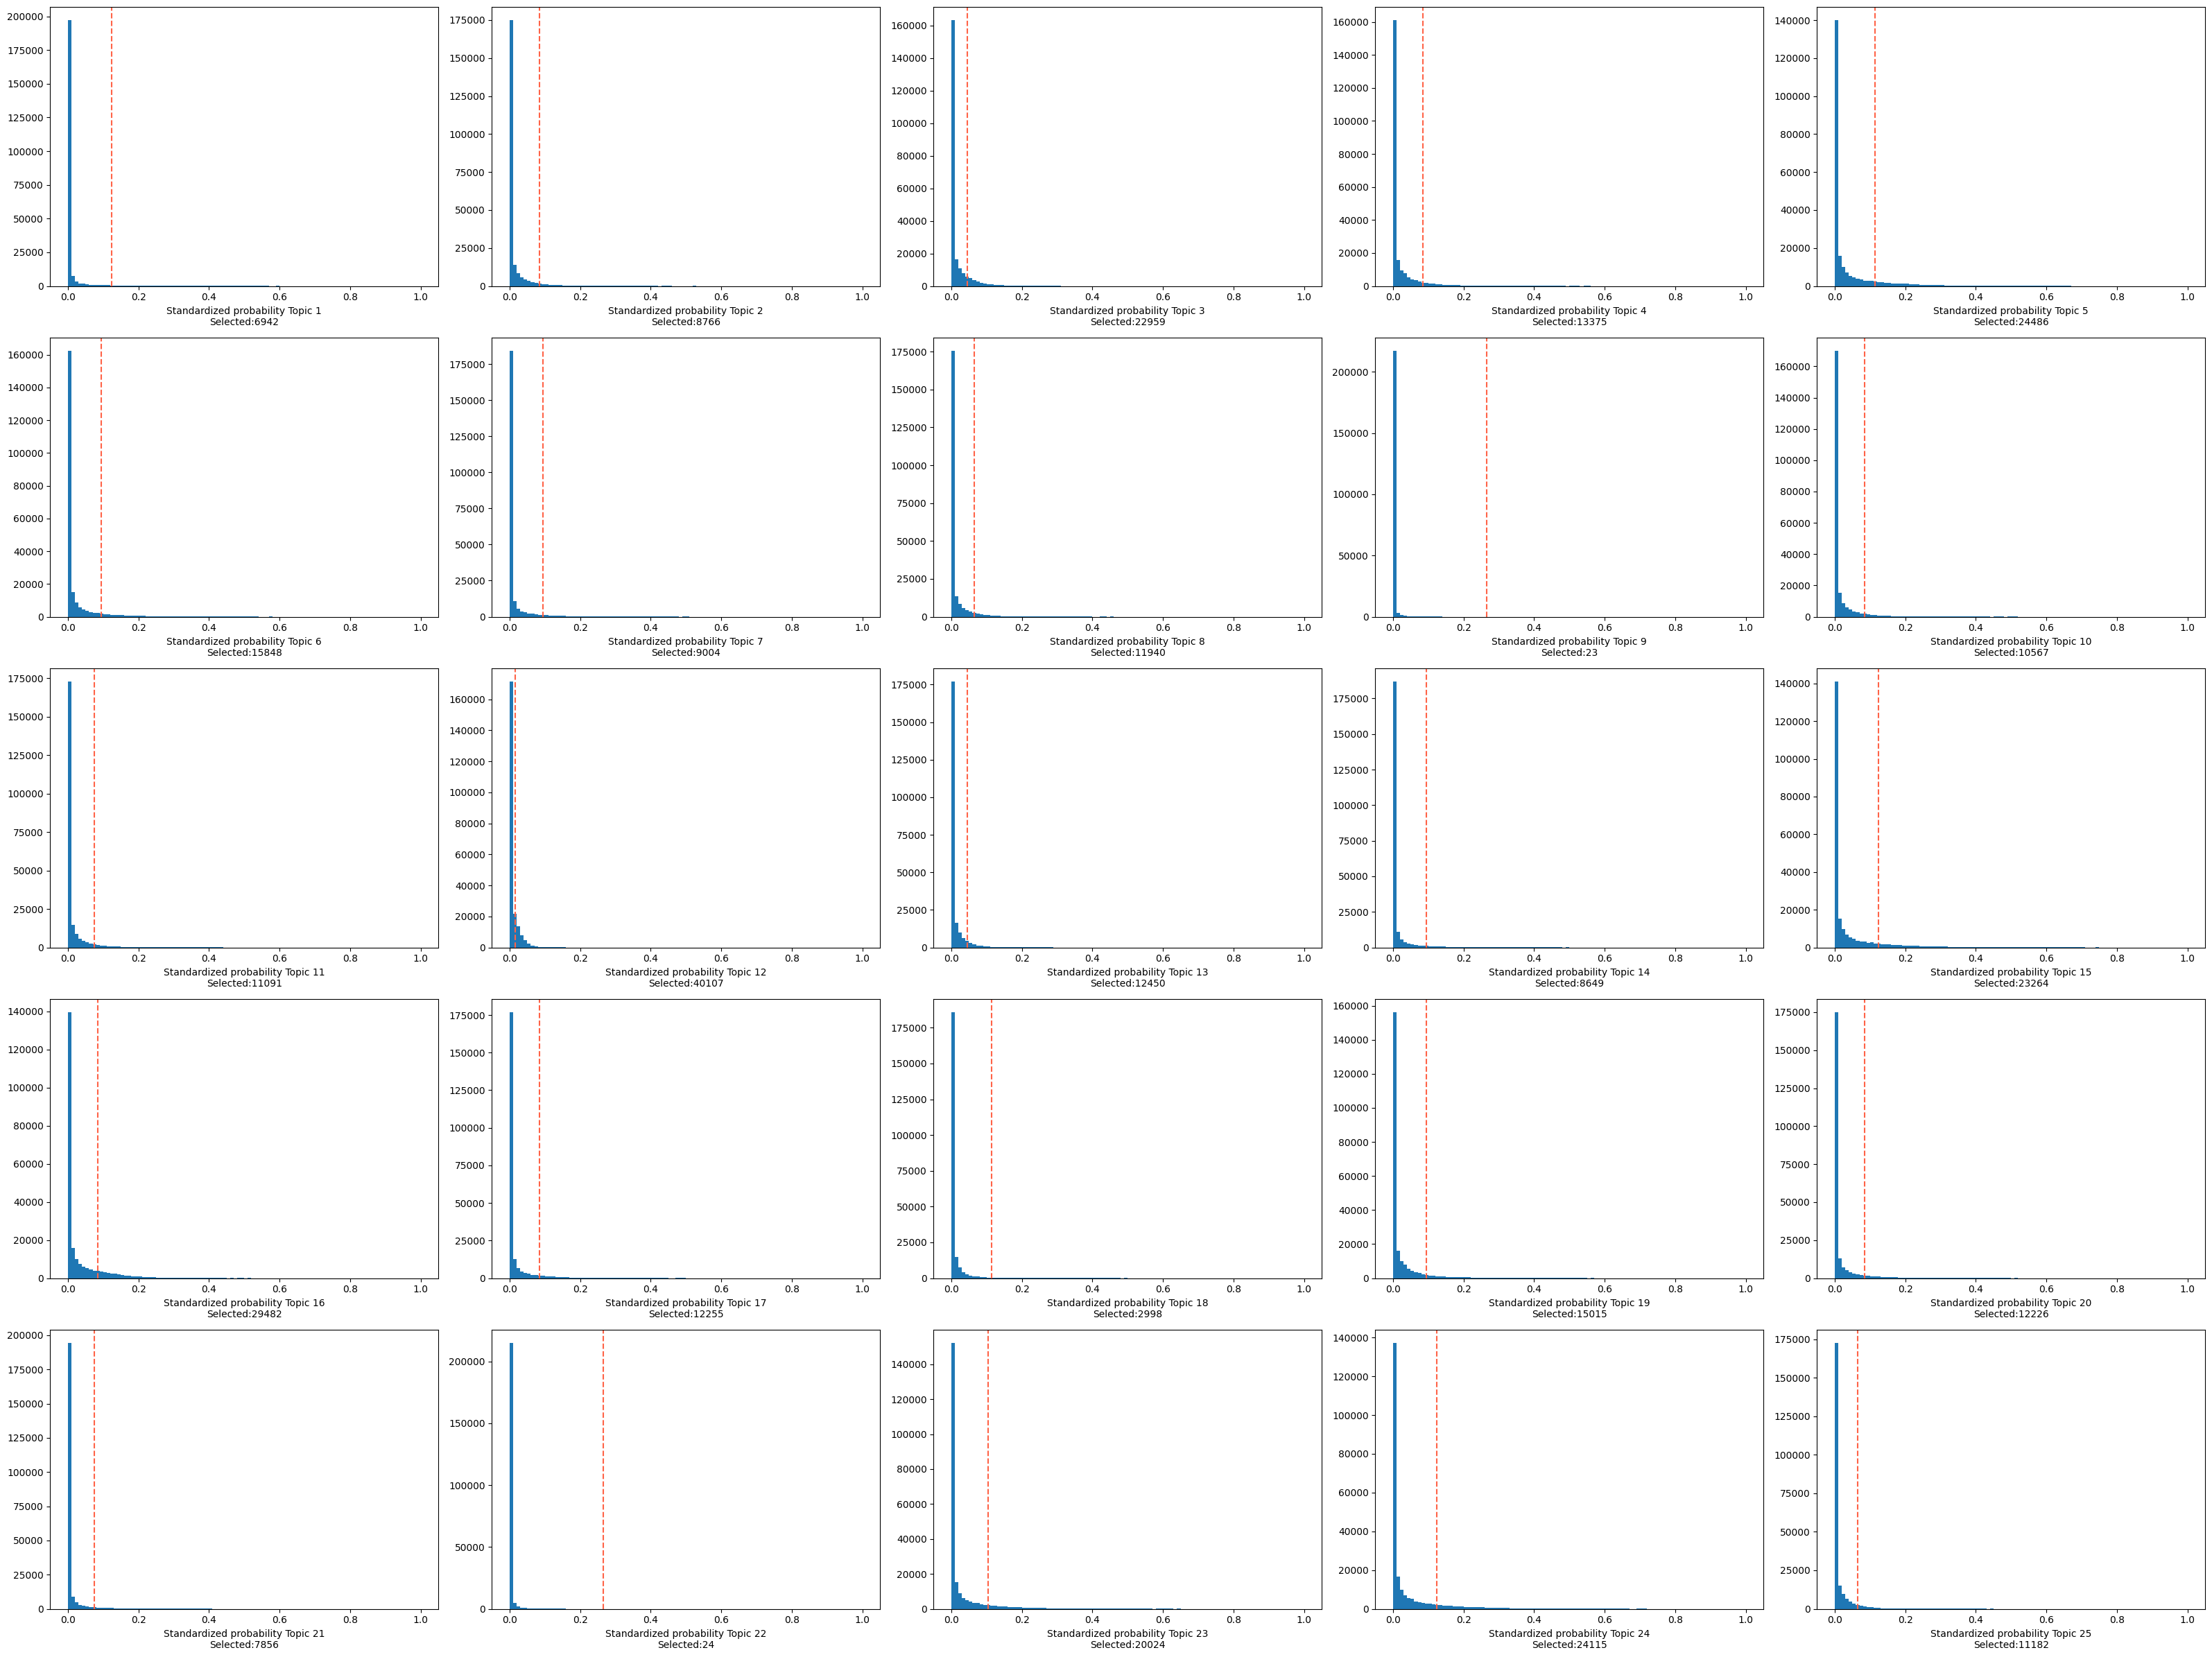

In [33]:
region_bin_topics_otsu = binarize_topics(
    cistopic_obj, method='otsu',
    plot=True, num_columns=5
)

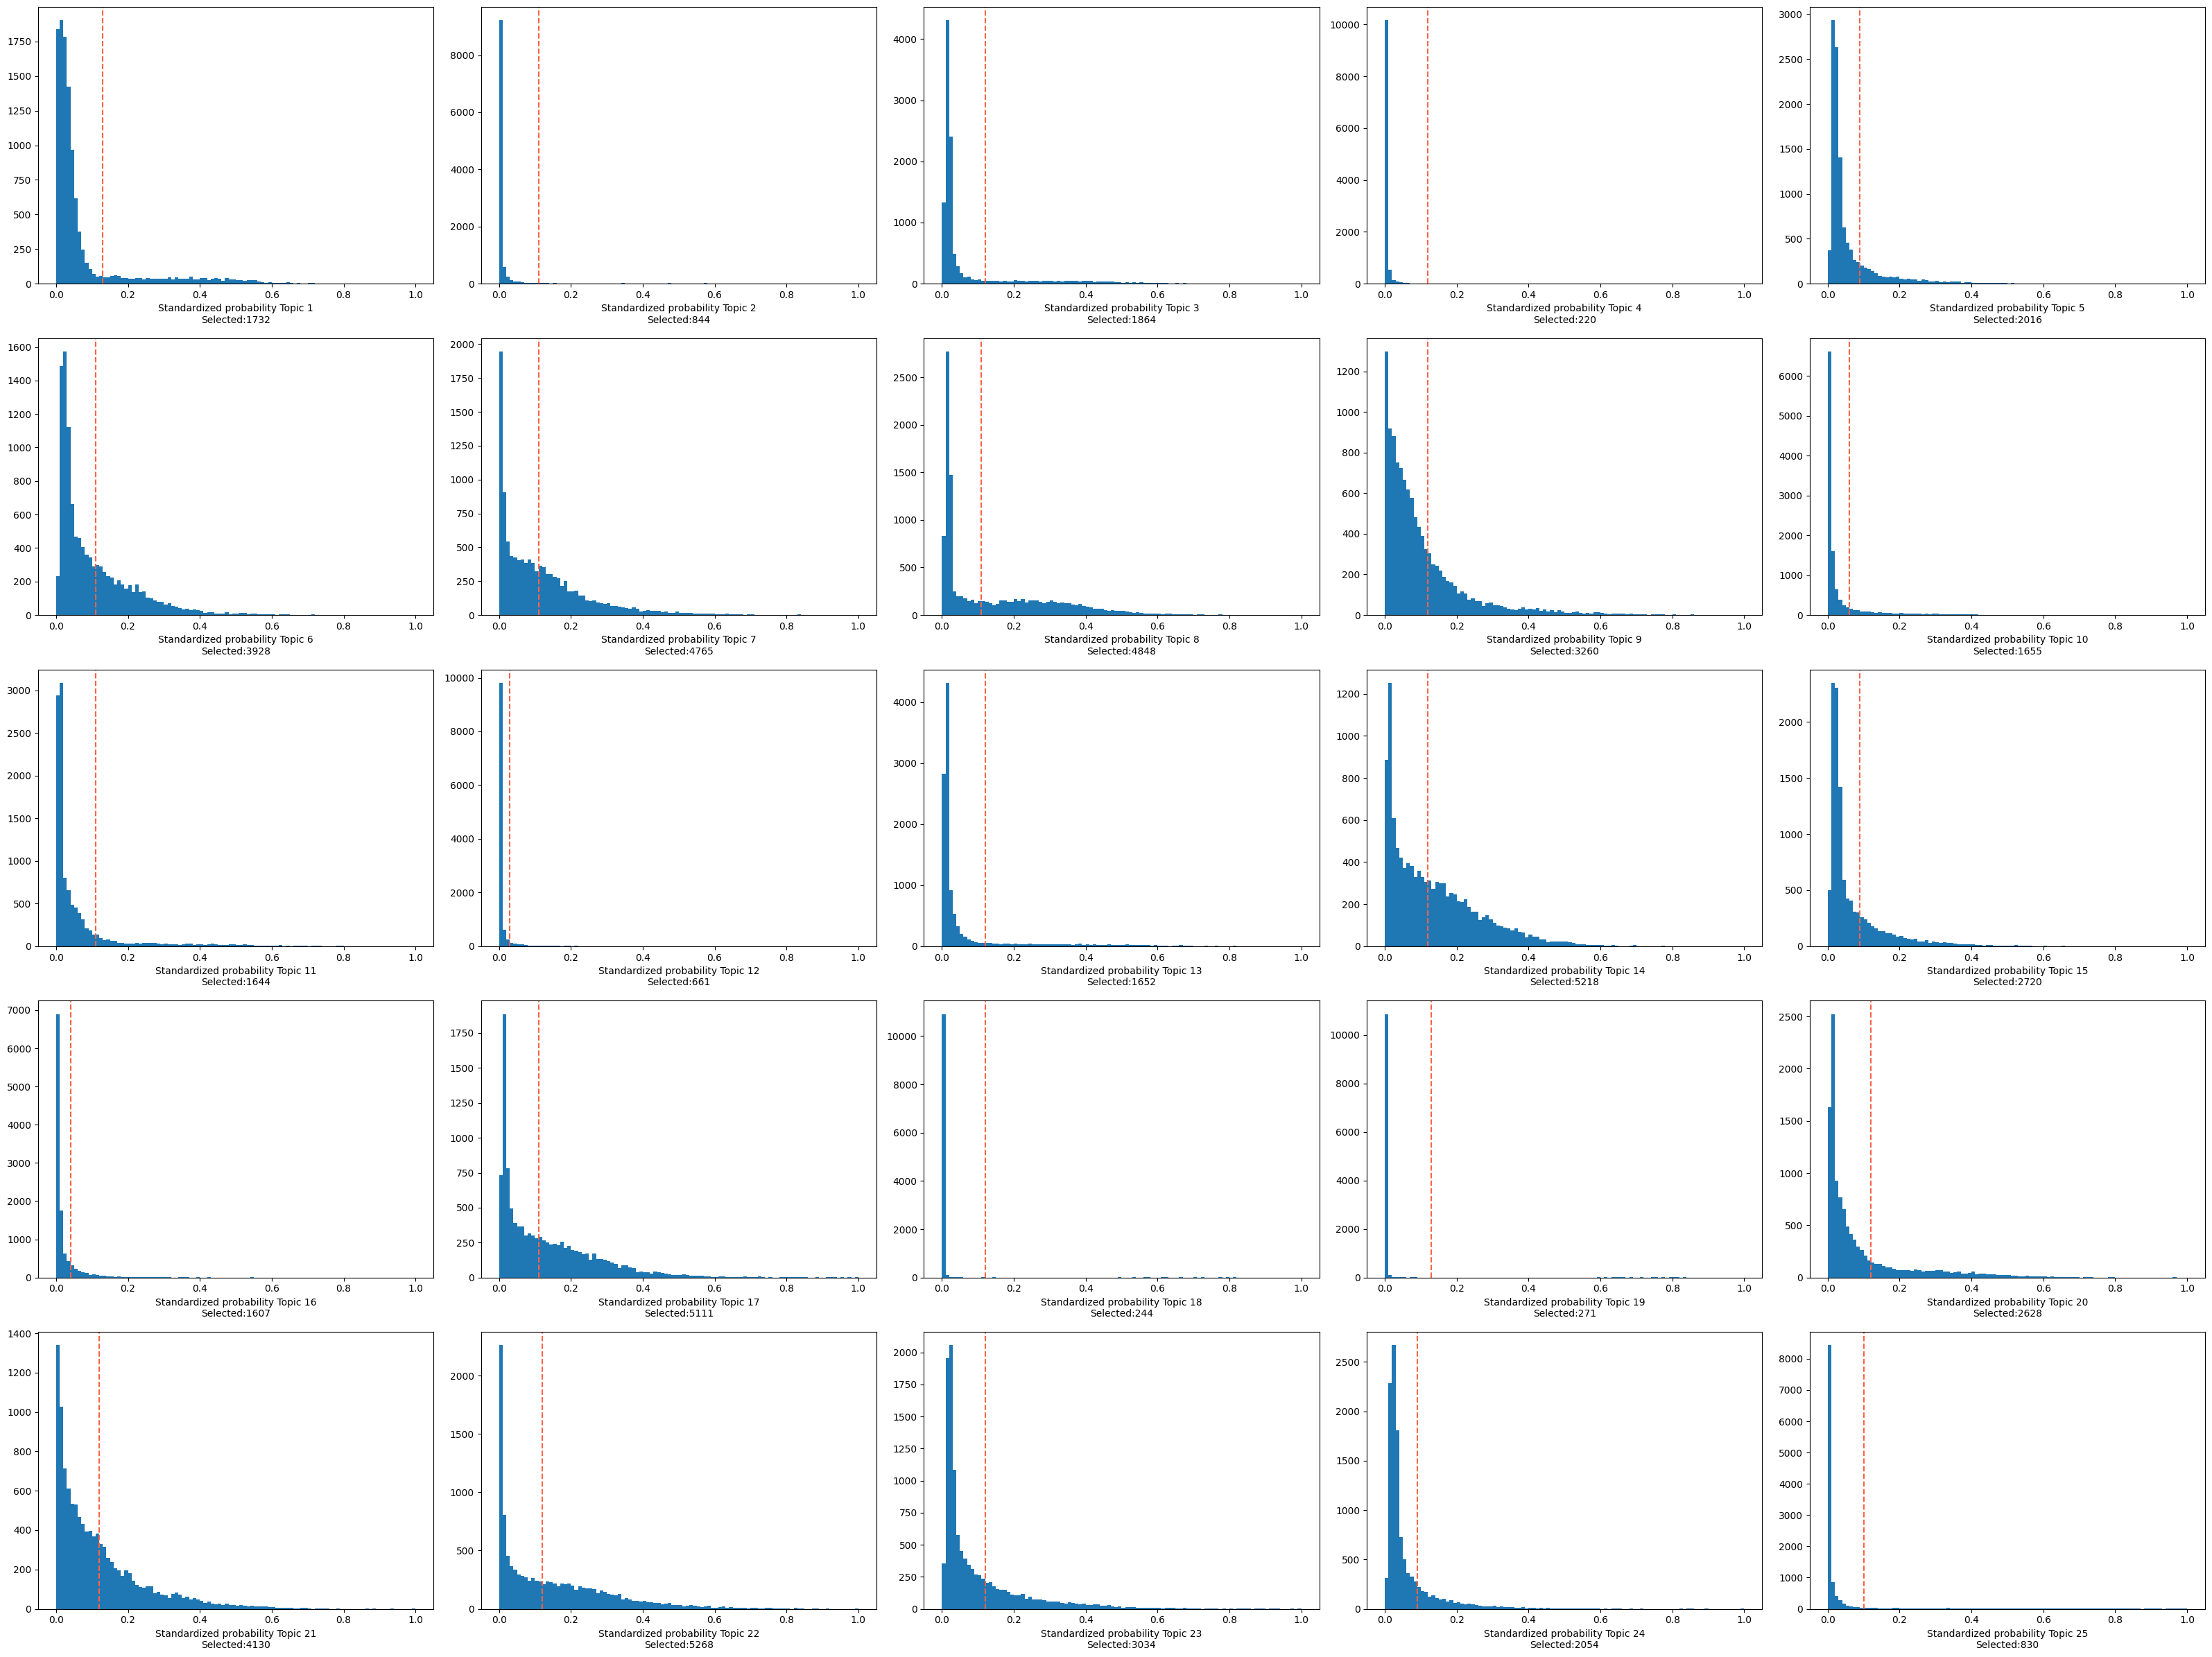

In [34]:
binarized_cell_topic = binarize_topics(
    cistopic_obj,
    target='cell',
    method='li',
    plot=True,
    num_columns=5, nbins=100)

In [35]:
from pycisTopic.topic_qc import compute_topic_metrics, plot_topic_qc, topic_annotation
import matplotlib.pyplot as plt
from pycisTopic.utils import fig2img

In [36]:
topic_qc_metrics = compute_topic_metrics(cistopic_obj)

In [37]:
fig_dict={}
fig_dict['CoherenceVSAssignments']=plot_topic_qc(topic_qc_metrics, var_x='Coherence', var_y='Log10_Assignments', var_color='Gini_index', plot=False, return_fig=True)
fig_dict['AssignmentsVSCells_in_bin']=plot_topic_qc(topic_qc_metrics, var_x='Log10_Assignments', var_y='Cells_in_binarized_topic', var_color='Gini_index', plot=False, return_fig=True)
fig_dict['CoherenceVSCells_in_bin']=plot_topic_qc(topic_qc_metrics, var_x='Coherence', var_y='Cells_in_binarized_topic', var_color='Gini_index', plot=False, return_fig=True)
fig_dict['CoherenceVSRegions_in_bin']=plot_topic_qc(topic_qc_metrics, var_x='Coherence', var_y='Regions_in_binarized_topic', var_color='Gini_index', plot=False, return_fig=True)
fig_dict['CoherenceVSMarginal_dist']=plot_topic_qc(topic_qc_metrics, var_x='Coherence', var_y='Marginal_topic_dist', var_color='Gini_index', plot=False, return_fig=True)
fig_dict['CoherenceVSGini_index']=plot_topic_qc(topic_qc_metrics, var_x='Coherence', var_y='Gini_index', var_color='Gini_index', plot=False, return_fig=True)

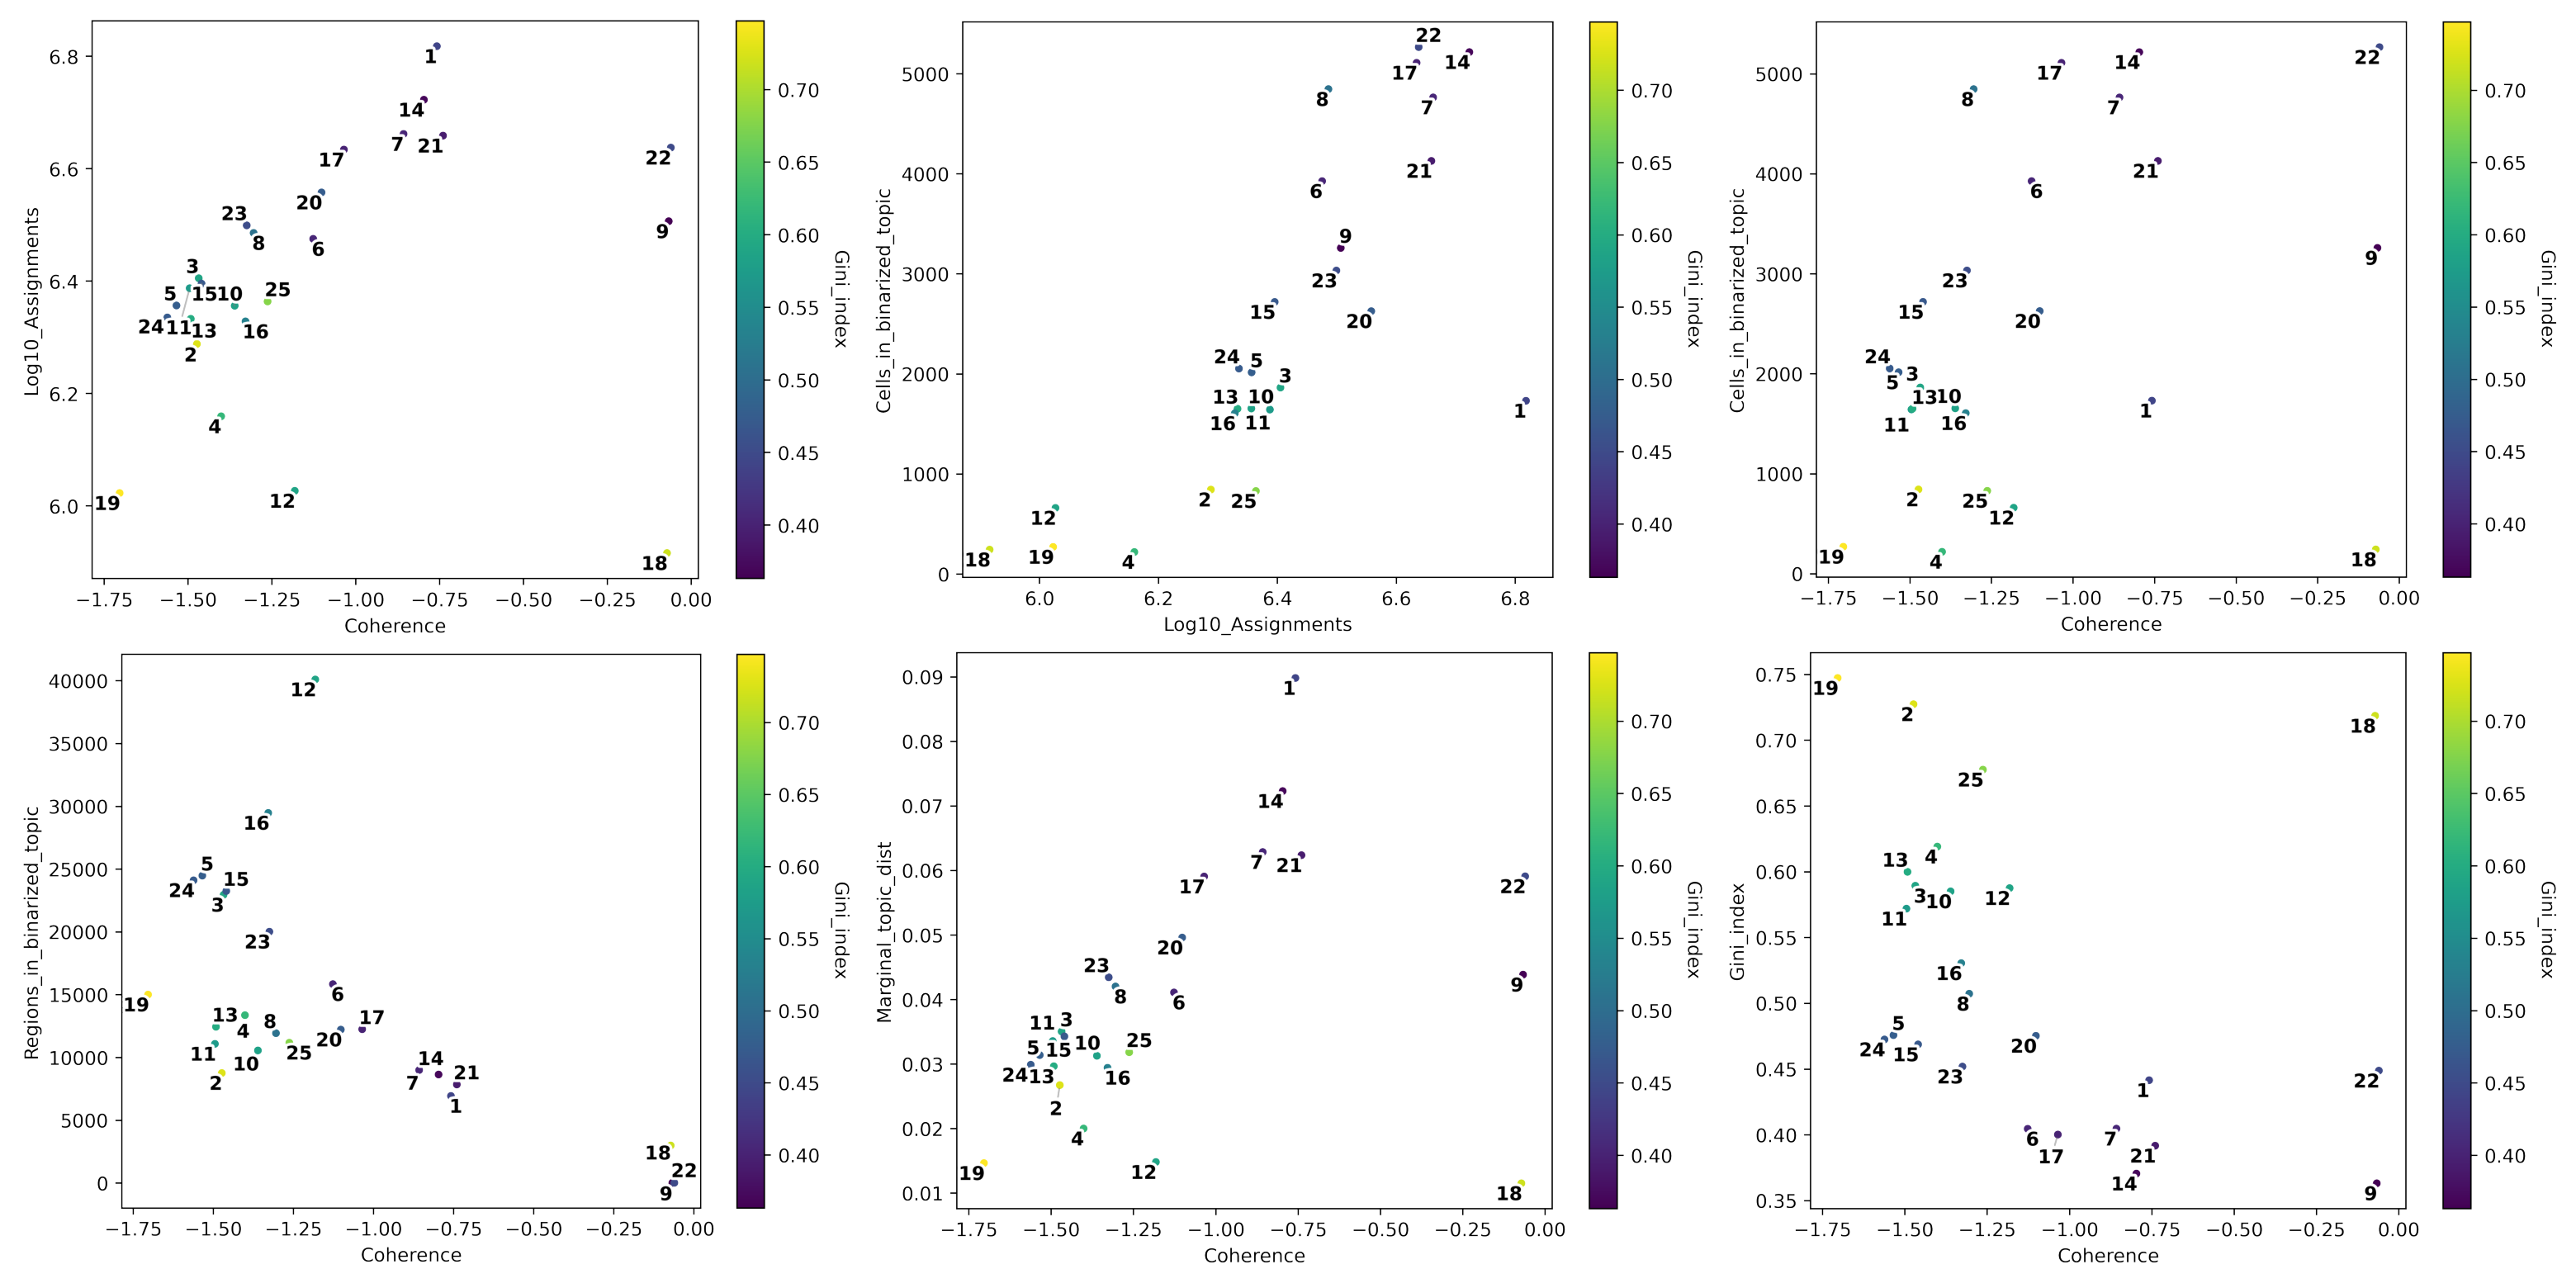

In [38]:
# Plot topic stats in one figure
fig=plt.figure(figsize=(40, 43))
i = 1
for fig_ in fig_dict.keys():
    plt.subplot(2, 3, i)
    img = fig2img(fig_dict[fig_]) #To convert figures to png to plot together, see .utils.py. This converts the figure to png.
    plt.imshow(img)
    plt.axis('off')
    i += 1
plt.subplots_adjust(wspace=0, hspace=-0.70)
plt.show()

Number of assignments

Topic coherence (Mimno et al., 2011): Measures to which extent high scoring regions in the topic are actually co-accessible in the original data. If it is low it indicates that the topic is rather random. The higher, the better is a topic.

The marginal topic distribution: Indicates how much each topic contributes to the model. The higher, the better is a topic.

The gini index: Value between 0 and 1, that indicates the specificity of topics (0: General, 1:Specific)

If topics have been binarized, the number of regions/cells per topic will be added.

# Cell type - topic annotation

In [39]:
topic_annot = topic_annotation(
    cistopic_obj,
    annot_var='cell_type_all',
    binarized_cell_topic=binarized_cell_topic,
    general_topic_thr = 0.2
)

/opt/venv/lib/python3.11/site-packages/statsmodels/stats/weightstats.py:792: RuntimeWarning: divide by zero encountered in scalar divide
  zstat = value / std


In [40]:
topic_annot

cell_type_all  \
Topic1   Tcm_Naive_helper_T_cells, Naive_B_cells, Mid_e...   
Topic2   Tcm_Naive_helper_T_cells, Tem_Trm_cytotoxic_T_...   
Topic3                                     Tumour_cells_D0   
Topic4                      Tumour_cells_D0, Naive_B_cells   
Topic5   Tumour_cells_D0, Tcm_Naive_helper_T_cells, Mid...   
Topic6                                     Tumour_cells_Q1   
Topic7   Tumour_cells_Q3, Tumour_cells_Q1, Tumour_cells_Q2   
Topic8                                     Tumour_cells_Q1   
Topic9   Tcm_Naive_helper_T_cells, Naive_B_cells, Non-c...   
Topic10  Tumour_cells_Q3, Classical_monocytes, Tumour_c...   
Topic11                                    Tumour_cells_Q2   
Topic12  Tcm_Naive_helper_T_cells, Mid_erythroid, Class...   
Topic13                                    Tumour_cells_Q3   
Topic14                   Tumour_cells_D0, Tumour_cells_Q1   
Topic15                   Tumour_cells_D0, Tumour_cells_Q1   
Topic16  Tumour_cells_Q3, Tumour_cells_D0, Tcm_Naive_he...   
Topic17                   Tumour_cells_D0, Tumour_cells_Q1   
Topic18            Tcm_Naive_helper_T_cells, Mid_erythroid   
Topic19       Non-classical_monocytes, Classical_monocytes   
Topic20                     Tumour_cells_D0, Naive_B_cells   
Topic21                   Tumour_cells_Q3, Tumour_cells_D0   
Topic22                                    Tumour_cells_Q1   
Topic23                   Tumour_cells_Q3, Tumour_cells_D0   
Topic24                   Tumour_cells_D0, Tumour_cells_Q1   
Topic25  Tcm_Naive_helper_T_cells, Tem_Trm_cytotoxic_T_...   

        Ratio_cells_in_topic Ratio_group_in_population  is_general  
Topic1              0.152909                  0.131809       False  
Topic2              0.074512                  0.092787       False  
Topic3              0.164563                  0.179218       False  
Topic4              0.019423                  0.191136       False  
Topic5              0.177982                  0.217975       False  
Topic6              0.346782                  0.446897       False  
Topic7              0.420676                  0.688973       False  
Topic8              0.428004                  0.446897       False  
Topic9              0.287808                  0.129425       False  
Topic10             0.146111                  0.259027       False  
Topic11              0.14514                  0.085106       False  
Topic12             0.058356                  0.172685       False  
Topic13             0.145846                   0.15697       False  
Topic14             0.460669                  0.626115       False  
Topic15             0.240134                  0.626115       False  
Topic16             0.141873                  0.467997       False  
Topic17             0.451223                  0.626115       False  
Topic18             0.021541                  0.038757       False  
Topic19             0.023925                   0.02472       False  
Topic20             0.232012                  0.191136       False  
Topic21             0.364616                  0.336188       False  
Topic22             0.465083                  0.446897       False  
Topic23             0.267856                  0.336188       False  
Topic24             0.181337                  0.626115       False  
Topic25             0.073276                  0.092787       False

# GREAT

In [18]:
from pycisTopic.pyGREAT import (
pyGREAT
)
import pyranges as pr
from pycisTopic.utils import region_names_to_coordinates

In [19]:
region_bin_topics_top_3k.keys()

dict_keys(['Topic1', 'Topic2', 'Topic3', 'Topic4', 'Topic5', 'Topic6', 'Topic7', 'Topic8', 'Topic9', 'Topic10', 'Topic11', 'Topic12', 'Topic13', 'Topic14', 'Topic15', 'Topic16', 'Topic17', 'Topic18', 'Topic19', 'Topic20', 'Topic21', 'Topic22', 'Topic23', 'Topic24', 'Topic25'])

In [20]:
# region_sets = {key: pr.PyRanges(region_names_to_coordinates(region_bin_topics_top_3k[key].index.tolist())) for key in region_bin_topics_top_3k.keys()} #['Topic12', 'Topic29', 'Topic30']}
# result = pyGREAT(region_sets, 'hg38', n_cpu=5)


In [31]:
# non default
region_sets = {key: pr.PyRanges(region_names_to_coordinates(region_bin_topics_top_3k[key].index.tolist())) for key in region_bin_topics_top_3k.keys()} #['Topic12', 'Topic29', 'Topic30']}
result = pyGREAT(region_sets, 'hg38', span = 1000,  n_cpu=5)


In [27]:
import numpy as np

In [38]:
result['Topic14']['GO Biological Process'][:40]

Ontology          ID  \
0   GO Biological Process  GO:0006342   
1   GO Biological Process  GO:0045814   
2   GO Biological Process  GO:0006335   
3   GO Biological Process  GO:0040029   
4   GO Biological Process  GO:0090304   
5   GO Biological Process  GO:0006139   
6   GO Biological Process  GO:0016458   
7   GO Biological Process  GO:0010608   
8   GO Biological Process  GO:0044260   
9   GO Biological Process  GO:0006333   
10  GO Biological Process  GO:0051290   
11  GO Biological Process  GO:0043933   
12  GO Biological Process  GO:0000183   
13  GO Biological Process  GO:0034641   
14  GO Biological Process  GO:0006364   
15  GO Biological Process  GO:0016070   
16  GO Biological Process  GO:0046483   
17  GO Biological Process  GO:0006417   
18  GO Biological Process  GO:2000112   
19  GO Biological Process  GO:0010467   
20  GO Biological Process  GO:0006725   
21  GO Biological Process  GO:0010556   
22  GO Biological Process  GO:0016072   
23  GO Biological Process  GO:0022613   
24  GO Biological Process  GO:1901360   
25  GO Biological Process  GO:0034248   
26  GO Biological Process  GO:0042254   
27  GO Biological Process  GO:0045652   
28  GO Biological Process  GO:0044238   
29  GO Biological Process  GO:0016071   
30  GO Biological Process  GO:0044271   
31  GO Biological Process  GO:0034728   
32  GO Biological Process  GO:0031497   
33  GO Biological Process  GO:0006325   
34  GO Biological Process  GO:0034654   
35  GO Biological Process  GO:0018130   
36  GO Biological Process  GO:0043170   
37  GO Biological Process  GO:0051276   
38  GO Biological Process  GO:0051171   
39  GO Biological Process  GO:0010468   

                                                 Desc BinomRank        BinomP  \
0                                 chromatin silencing         1  3.879762e-27   
1   negative regulation of gene expression, epigen...         2  3.563972e-25   
2       DNA replication-dependent nucleosome assembly         3  1.721267e-24   
3           regulation of gene expression, epigenetic         4  8.396746e-24   
4                      nucleic acid metabolic process         5  1.930228e-19   
5    nucleobase-containing compound metabolic process         6  7.242420e-19   
6                                      gene silencing         7  3.812774e-18   
7   posttranscriptional regulation of gene expression         8  7.553409e-18   
8            cellular macromolecule metabolic process         9  7.767344e-18   
9                   chromatin assembly or disassembly        10  1.551772e-17   
10                      protein heterotetramerization        11  2.039131e-17   
11        macromolecular complex subunit organization        12  3.426661e-17   
12                        chromatin silencing at rDNA        13  3.664713e-17   
13       cellular nitrogen compound metabolic process        14  6.810758e-17   
14                                    rRNA processing        15  1.052220e-16   
15                              RNA metabolic process        16  2.469307e-16   
16                      heterocycle metabolic process        17  2.843265e-16   
17                          regulation of translation        18  2.934931e-16   
18  regulation of cellular macromolecule biosynthe...        19  4.267219e-16   
19                                    gene expression        20  4.604143e-16   
20       cellular aromatic compound metabolic process        21  4.966574e-16   
21   regulation of macromolecule biosynthetic process        22  5.315817e-16   
22                             rRNA metabolic process        23  7.553985e-16   
23               ribonucleoprotein complex biogenesis        24  8.164894e-16   
24          organic cyclic compound metabolic process        25  1.202360e-15   
25     regulation of cellular amide metabolic process        26  1.288953e-15   
26                                ribosome biogenesis        27  1.587121e-15   
27        regulation of megakaryocyte differentiation        28  2.

Topic1


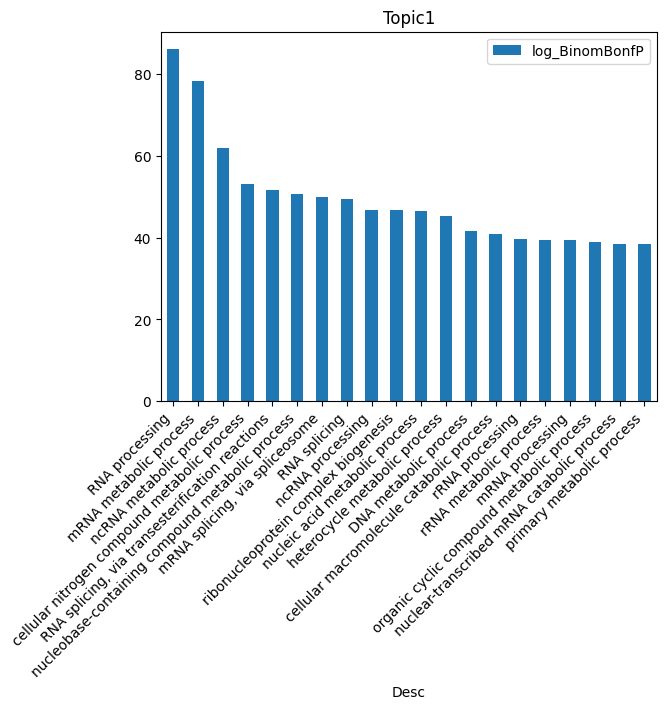



Topic2


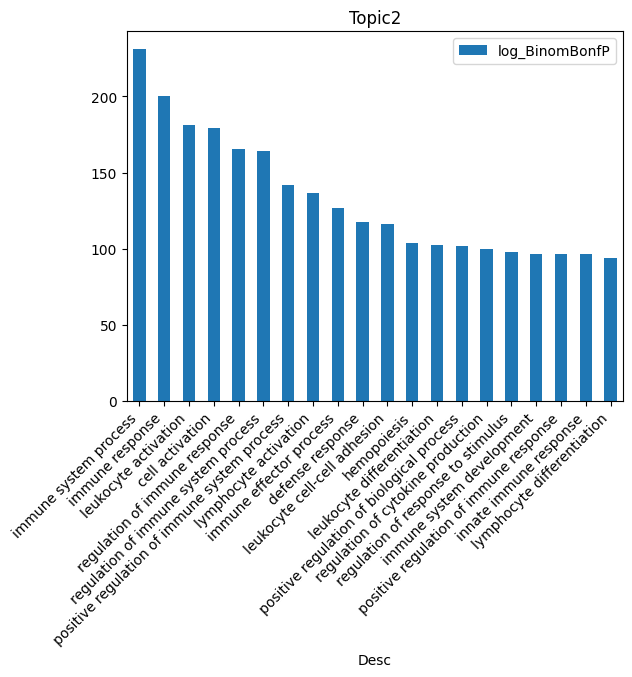



Topic3


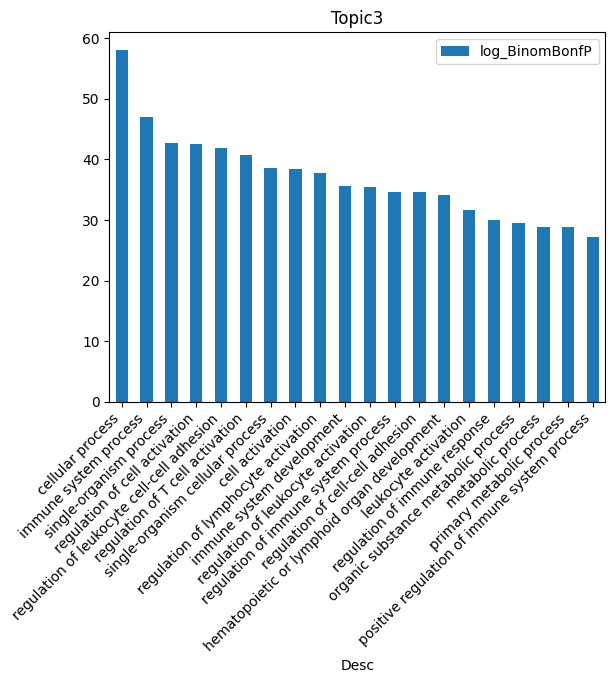



Topic4


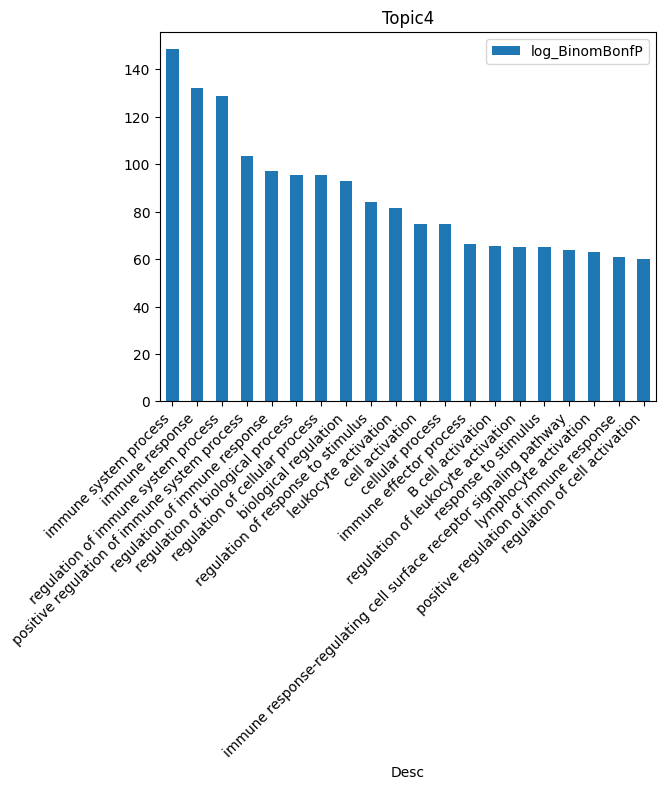



Topic5


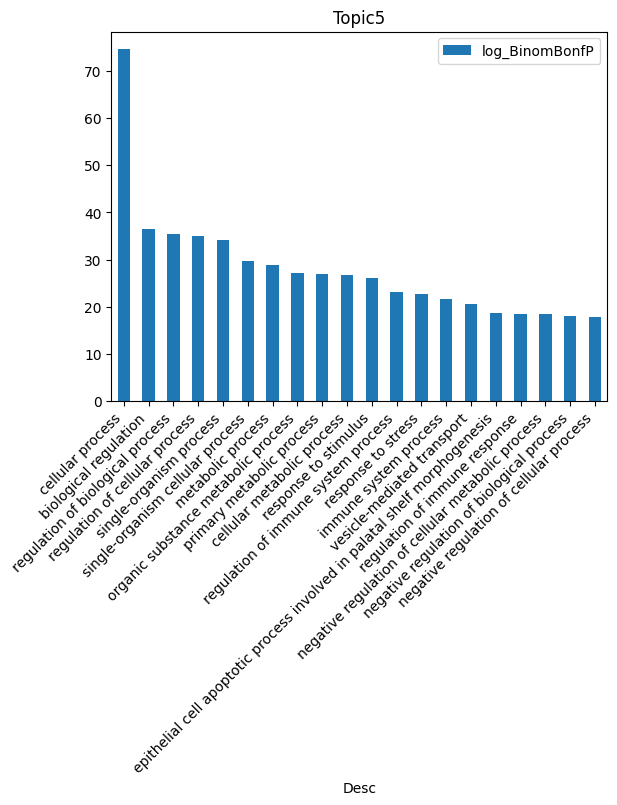



Topic6


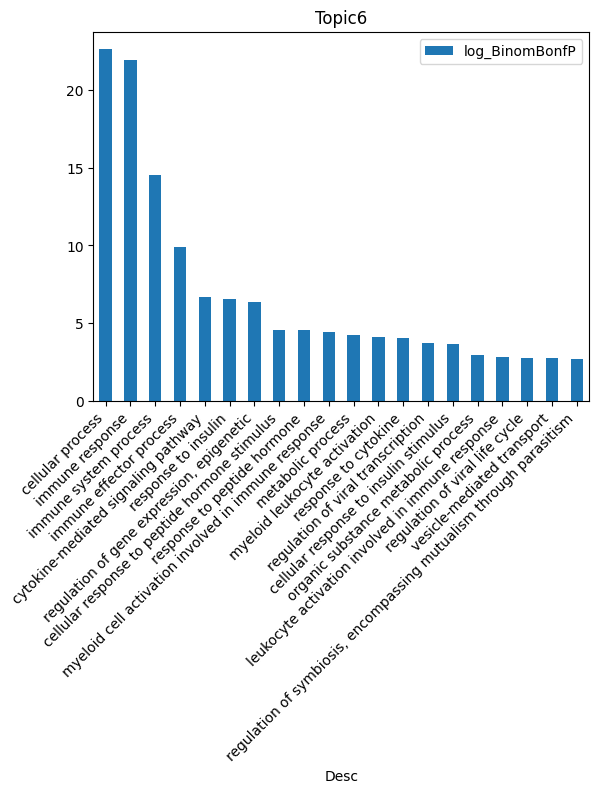



Topic7


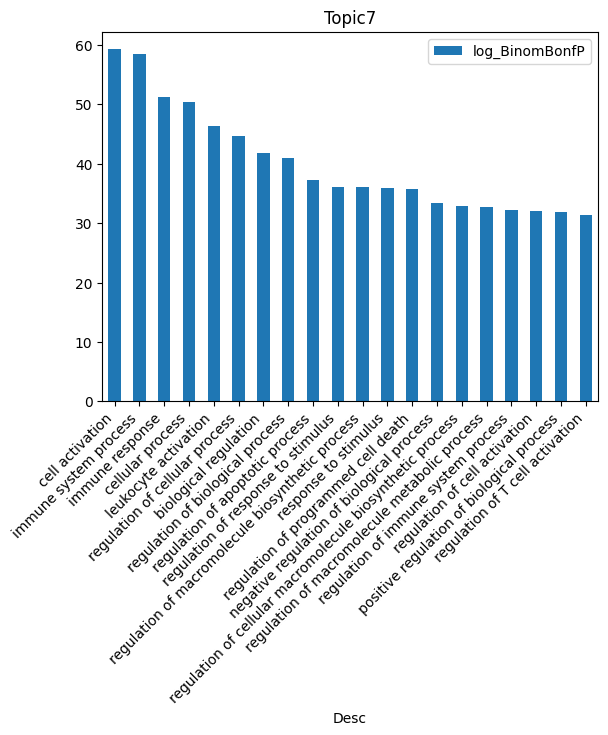



Topic8


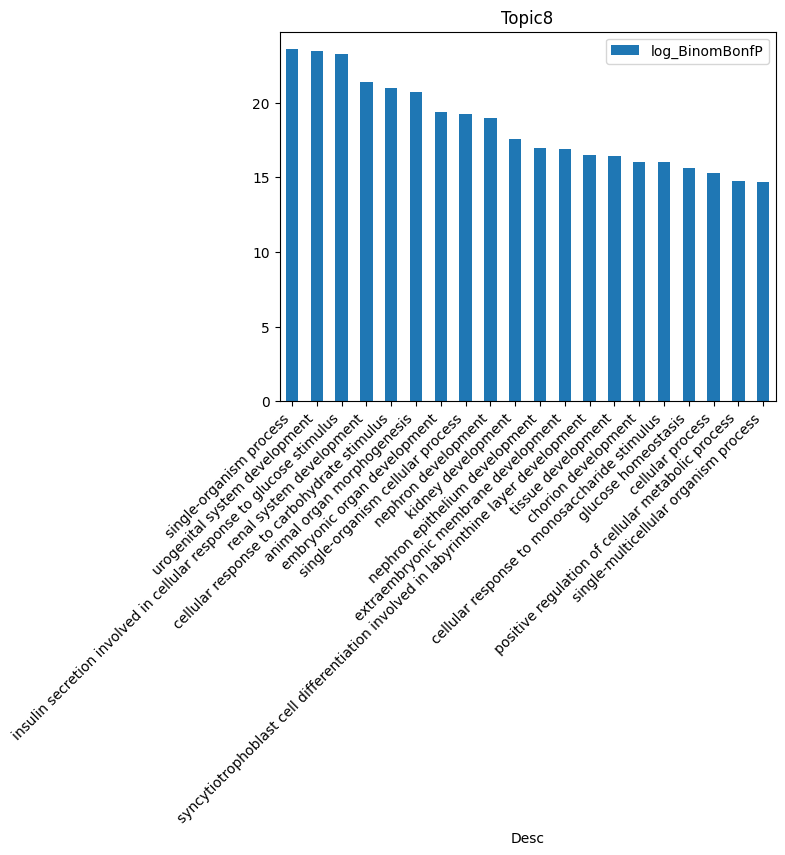



Topic9


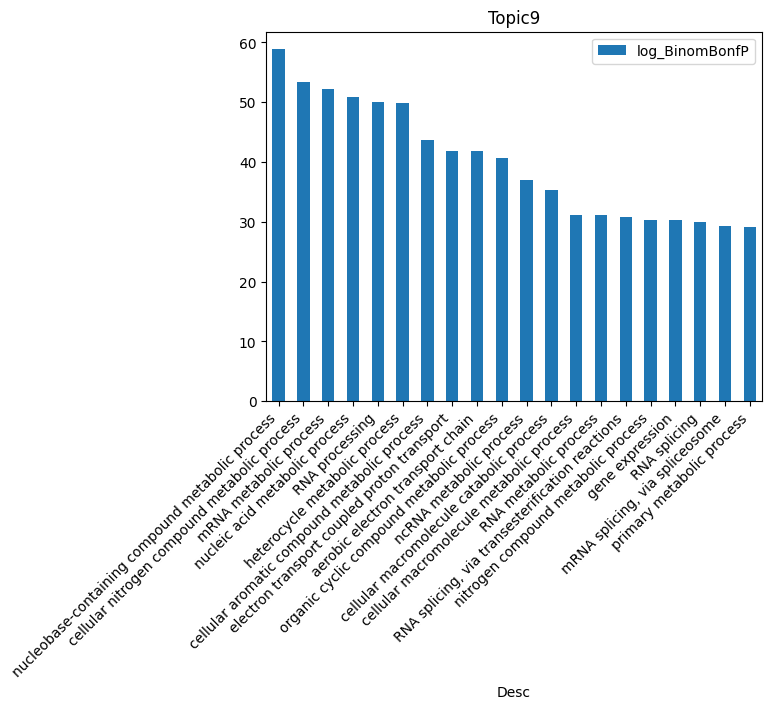



Topic10


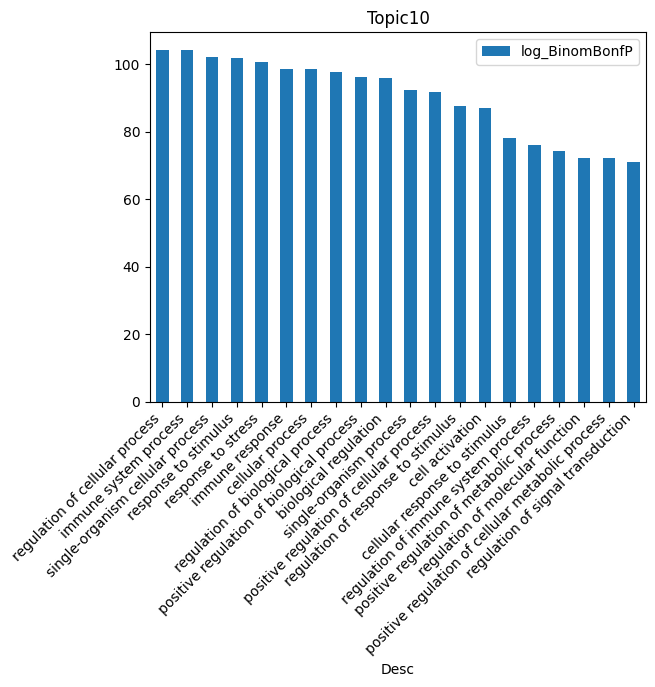



Topic11


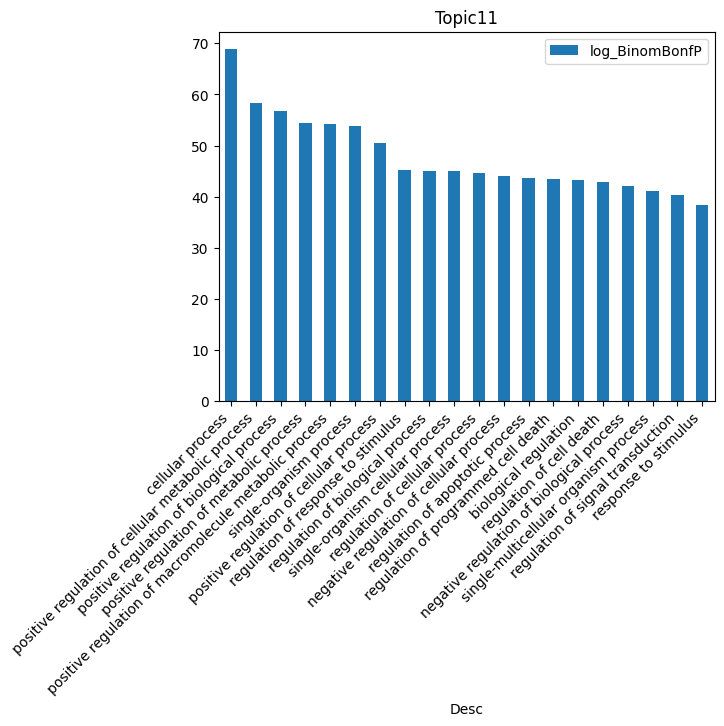



Topic12


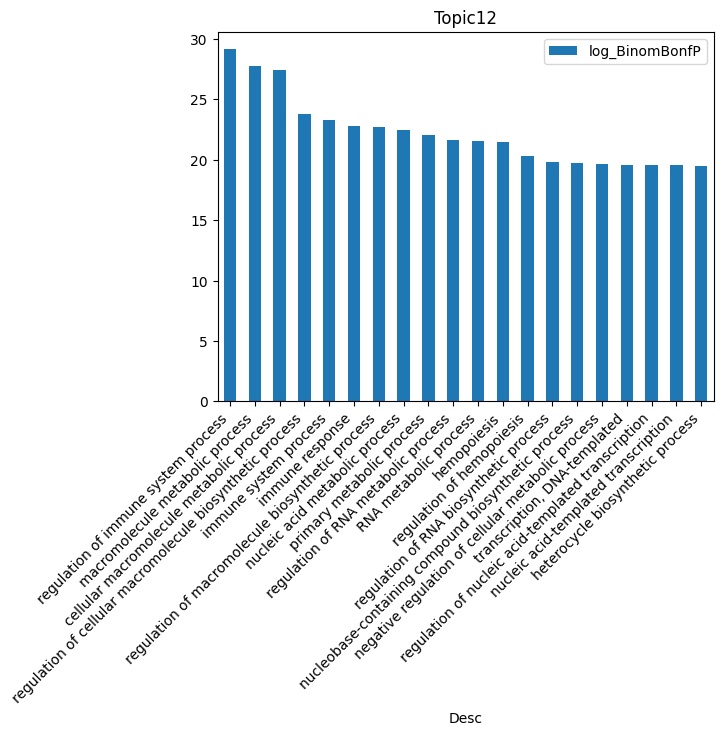



Topic13


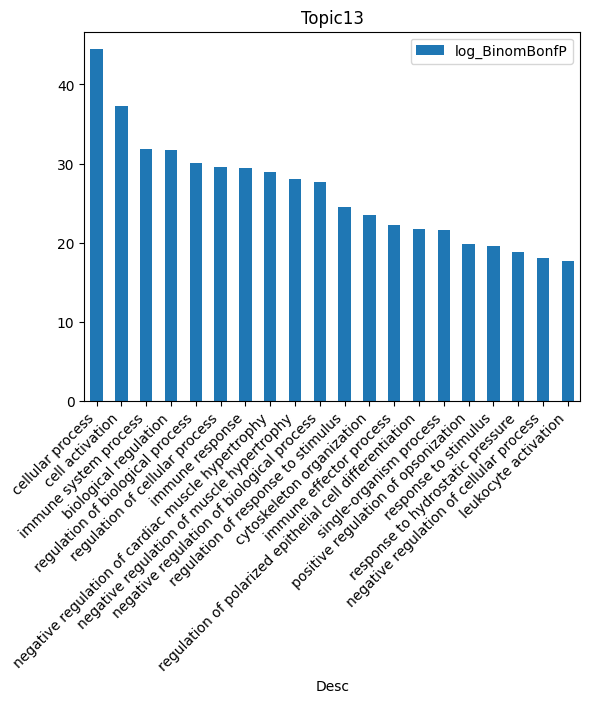



Topic14


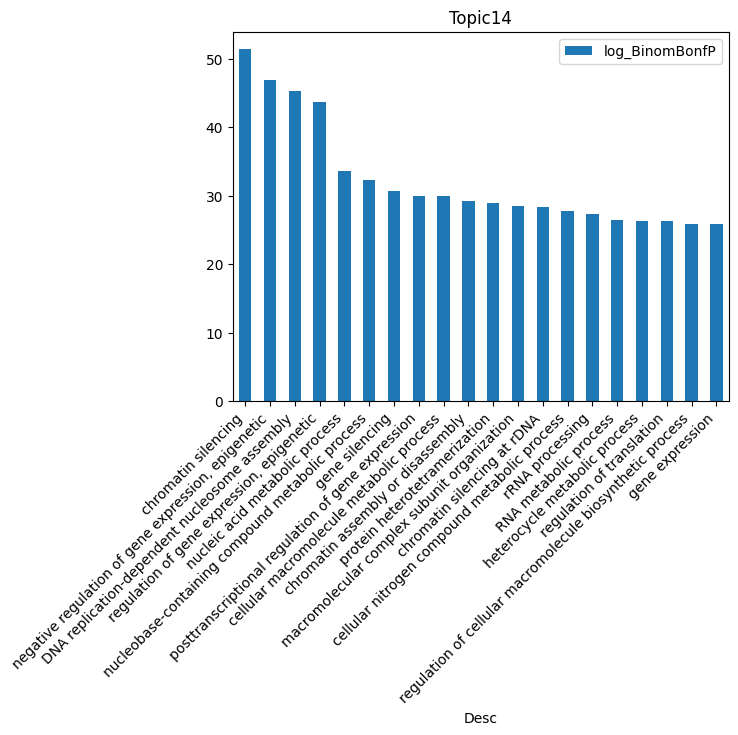



Topic15


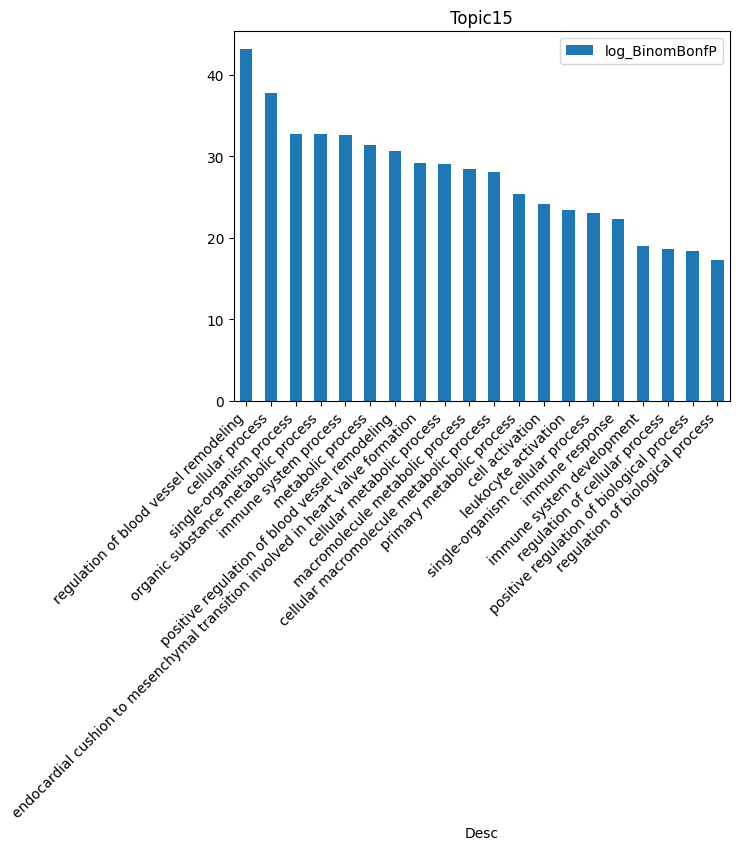



Topic16


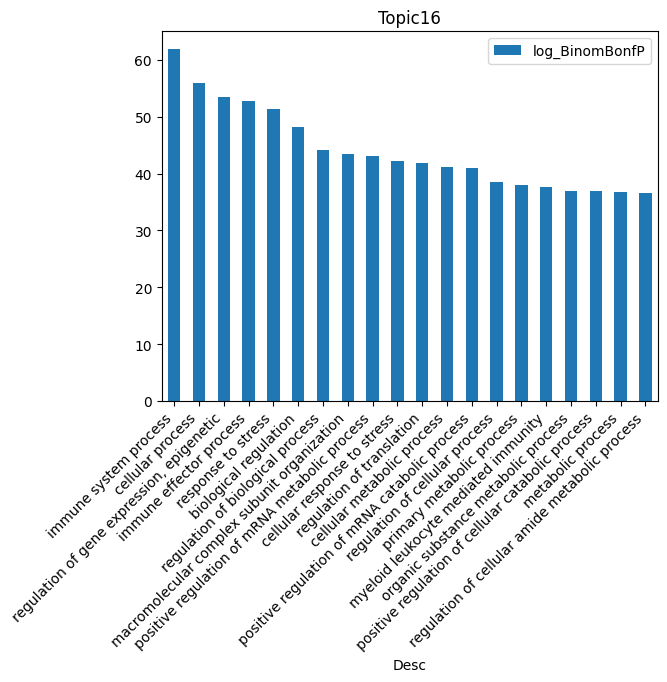



Topic17


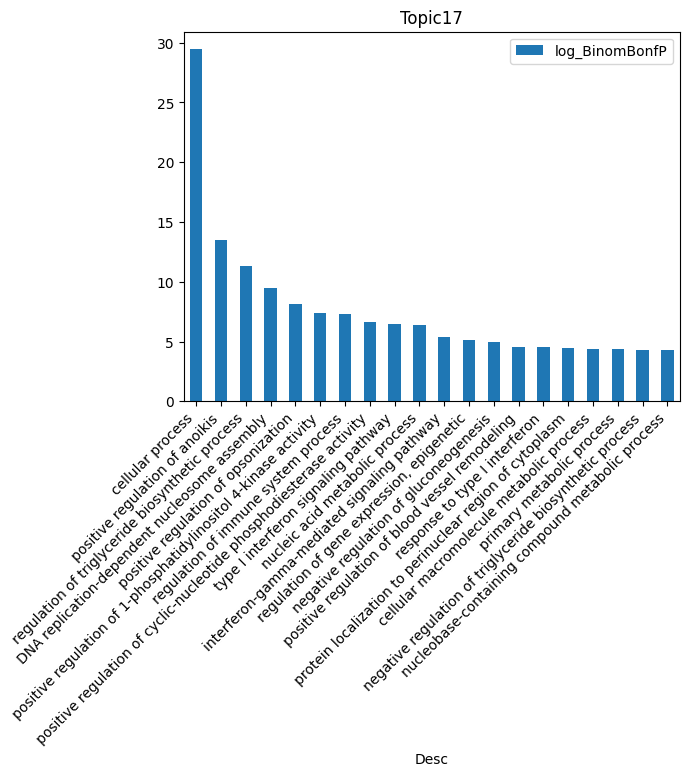



Topic18


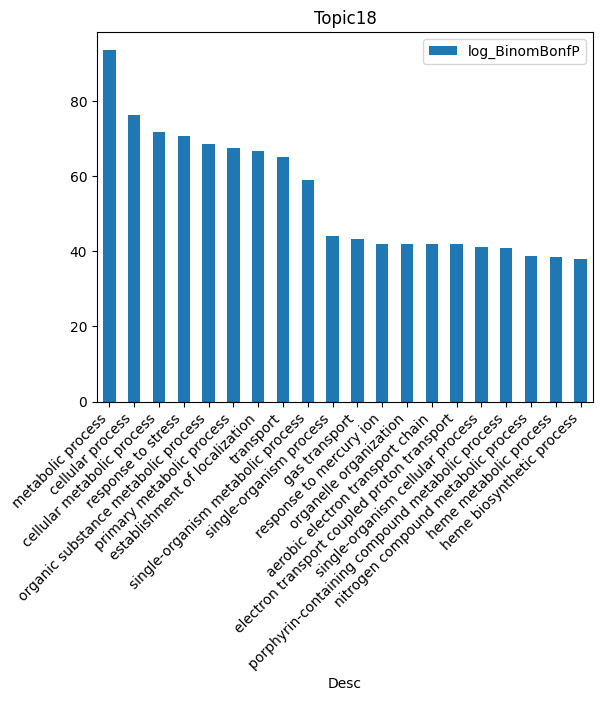



Topic19


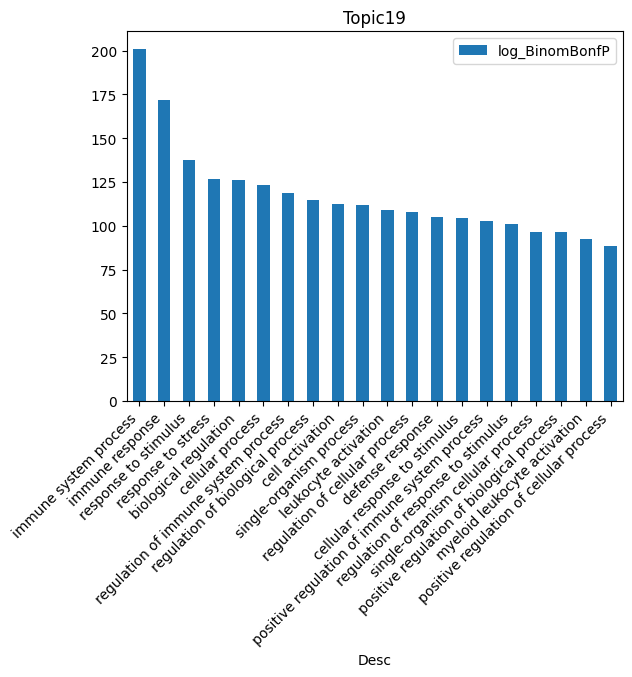



Topic20


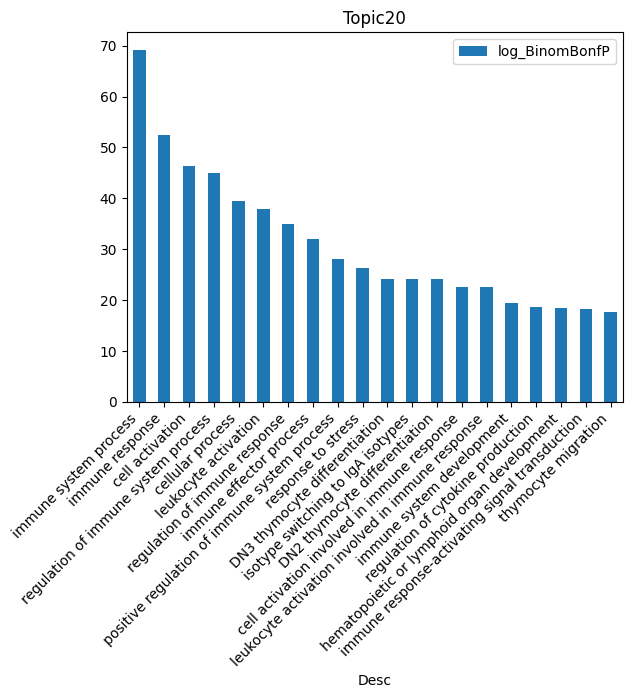



Topic21


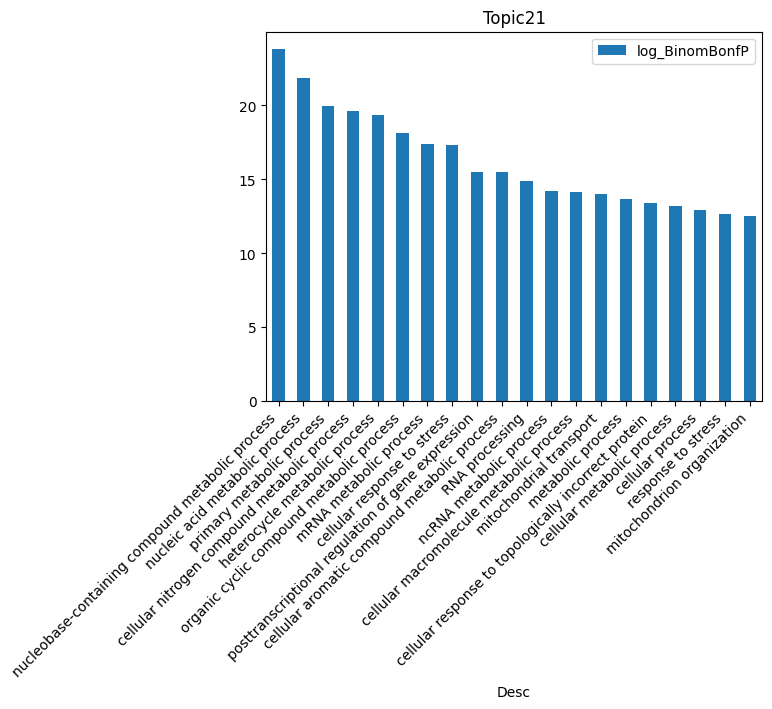



Topic22


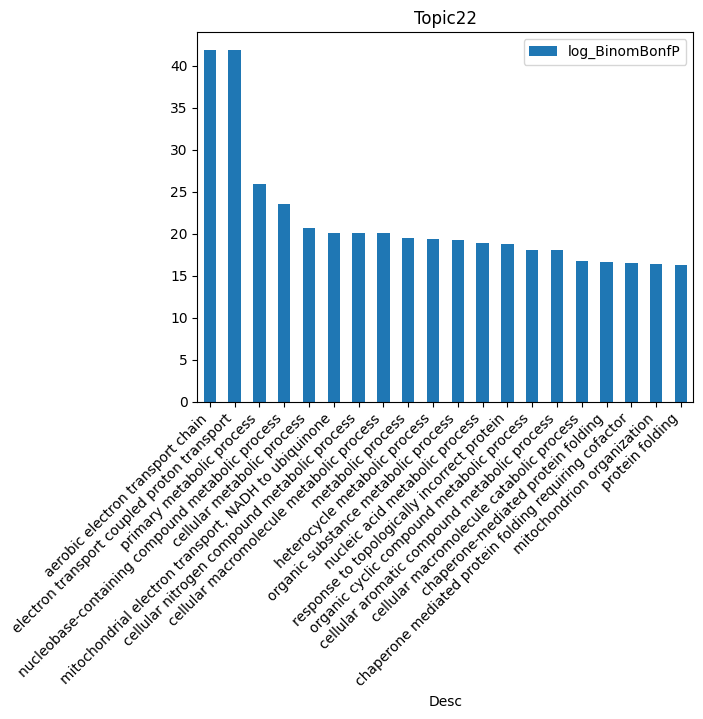



Topic23


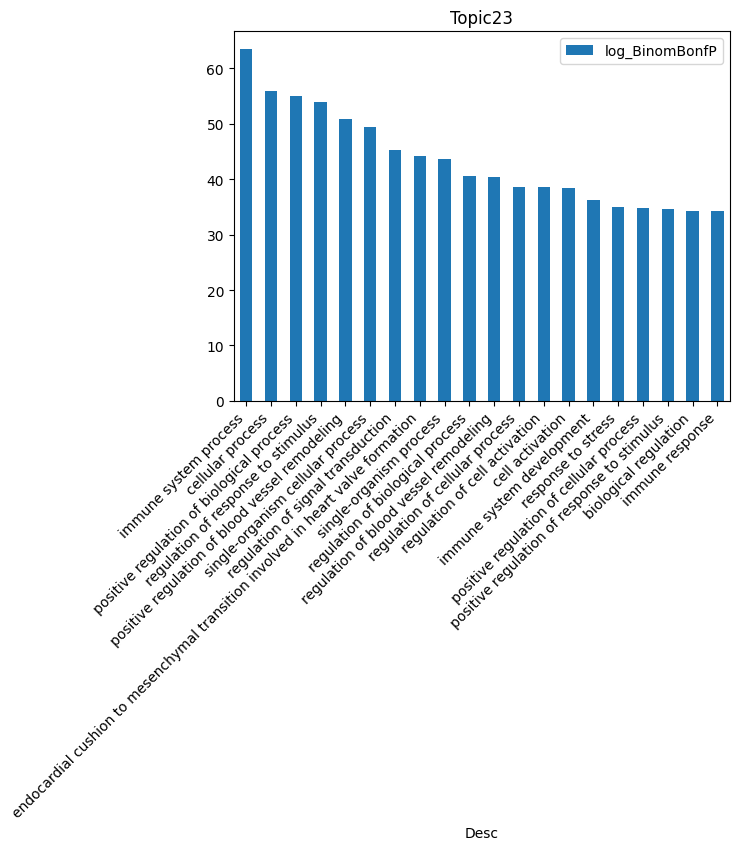



Topic24


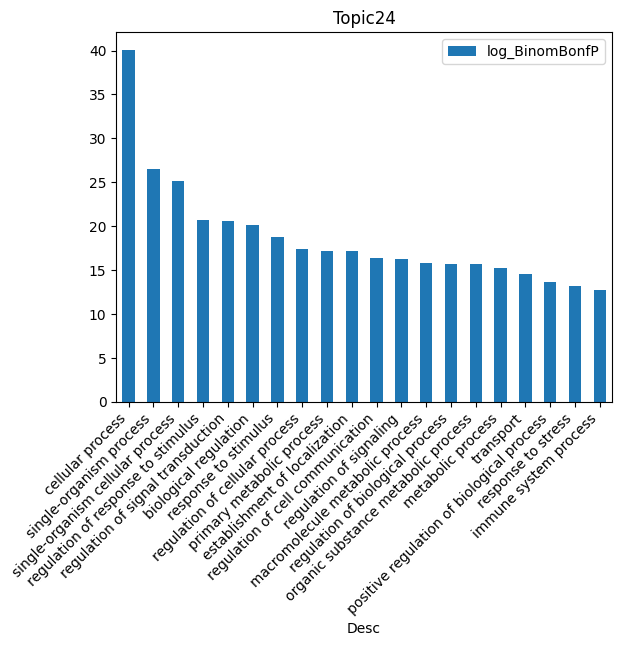



Topic25


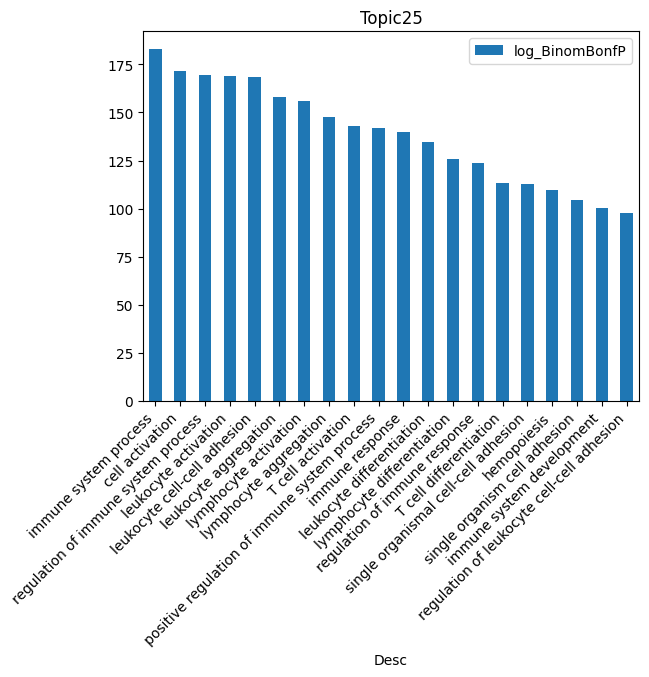

In [32]:
for i in region_bin_topics_top_3k.keys():
    print(i)
    df = result[i]['GO Biological Process']
    [x for x in df.Desc.tolist() if x not in df.Desc.tolist()]
    df['log_BinomBonfP'] =  np.abs(np.log(df['BinomBonfP'].astype(float)))
    df.head(20).plot.bar(x = 'Desc', y = 'log_BinomBonfP', rot=0)
    plt.title(i)
    plt.xticks(rotation = 45, ha='right')
    plt.show()
    print("\n")

Topic1


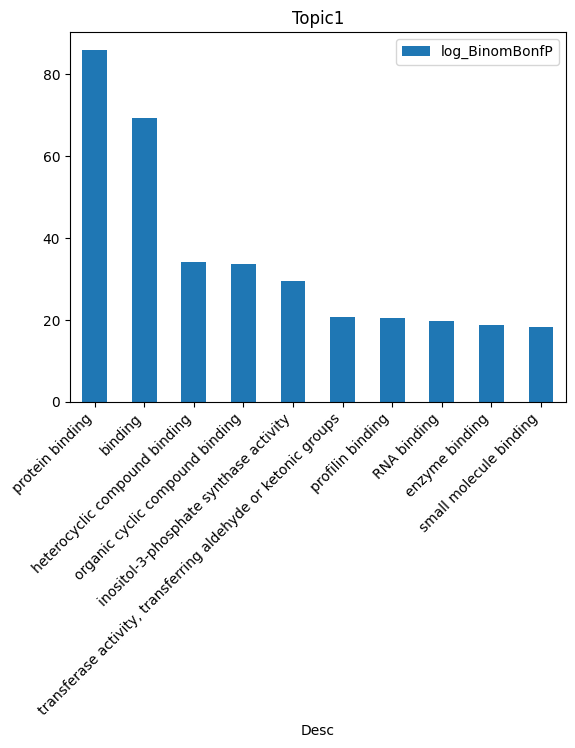



Topic2


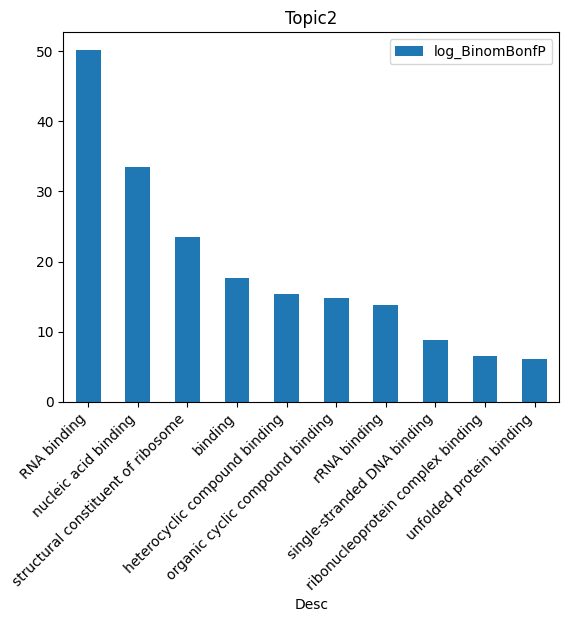



Topic3


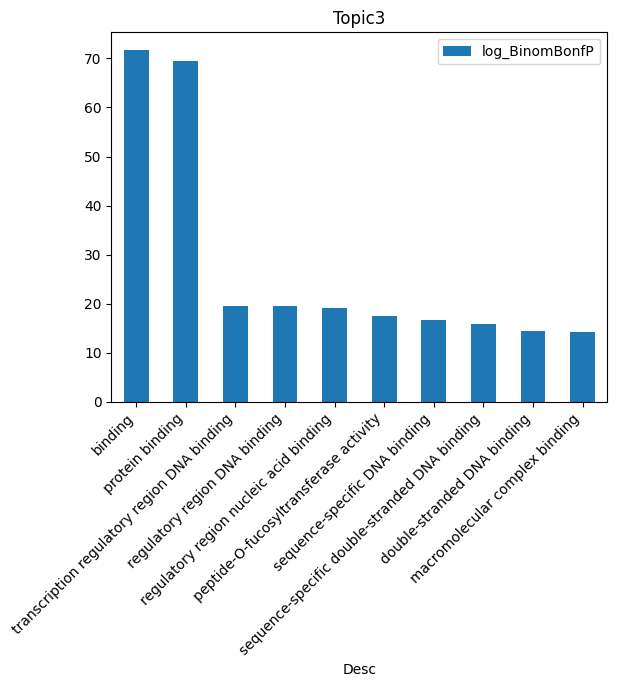



Topic4


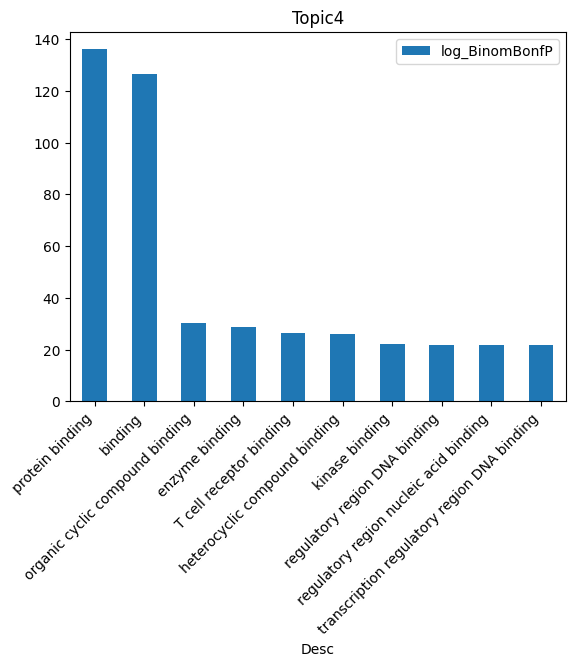



Topic5


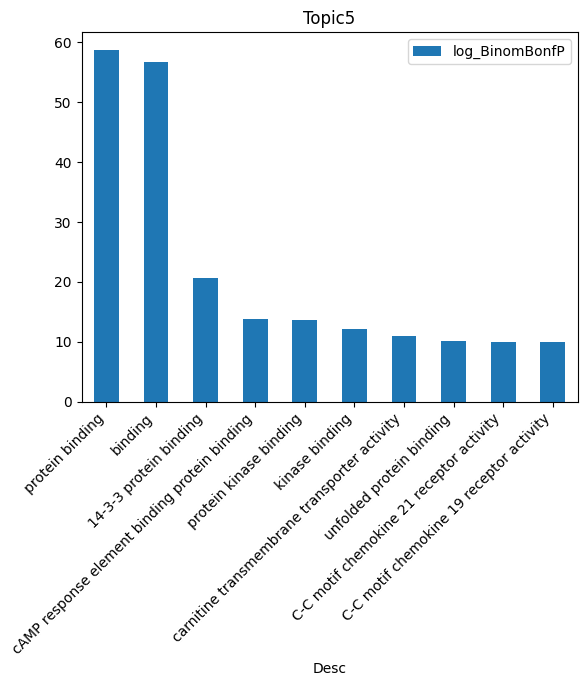



Topic6


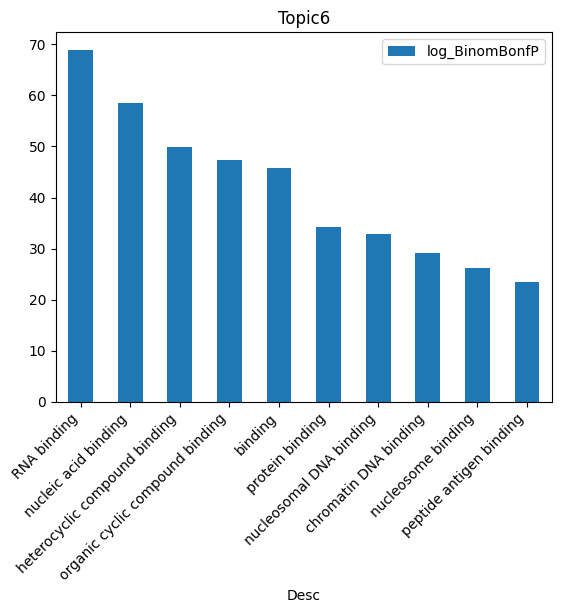



Topic7


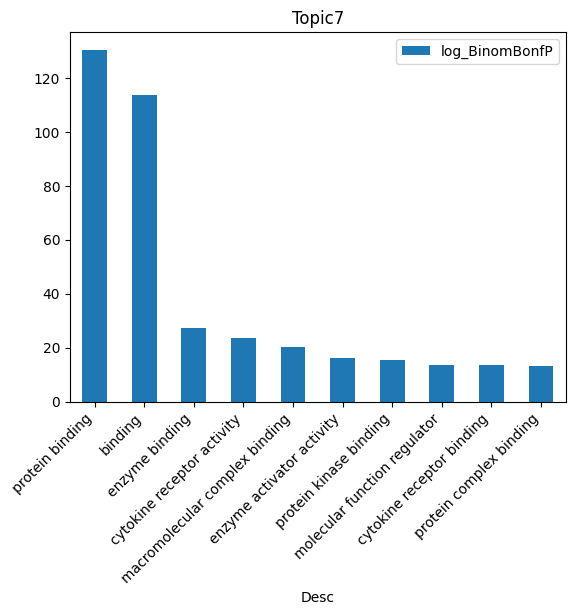



Topic8


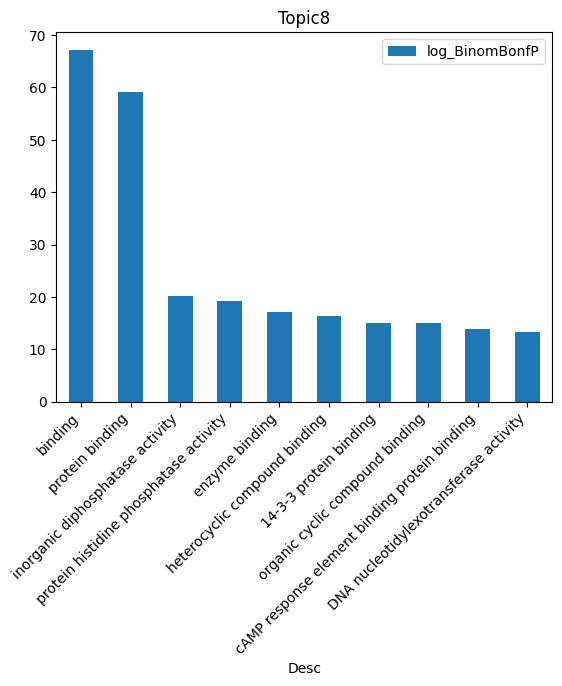



Topic9


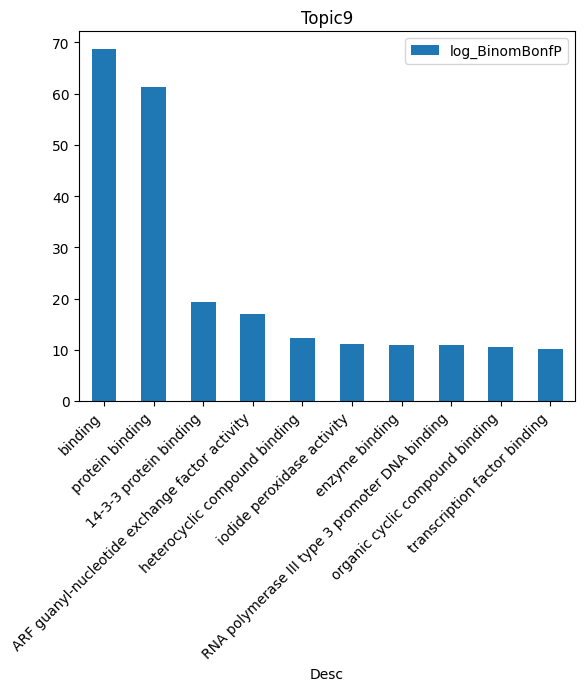



Topic10


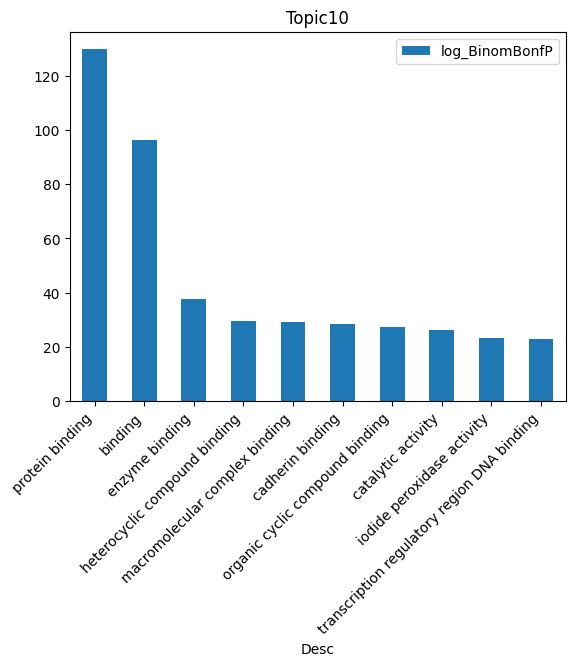



Topic11


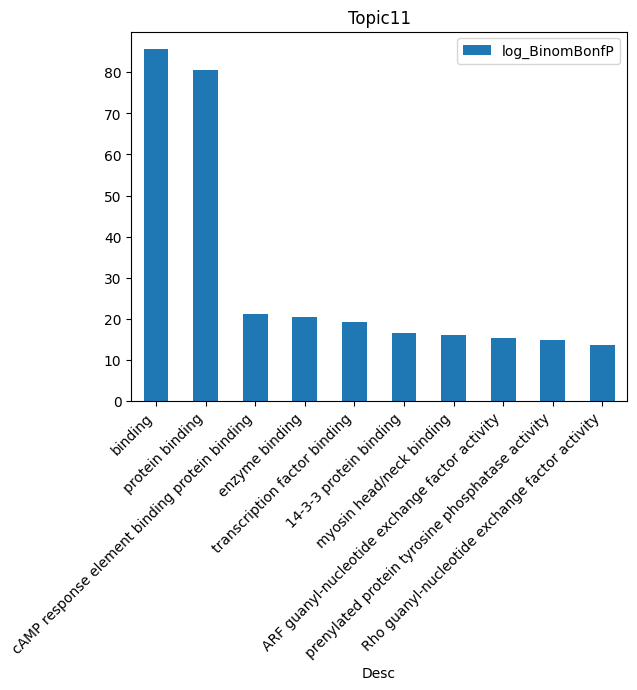



Topic12


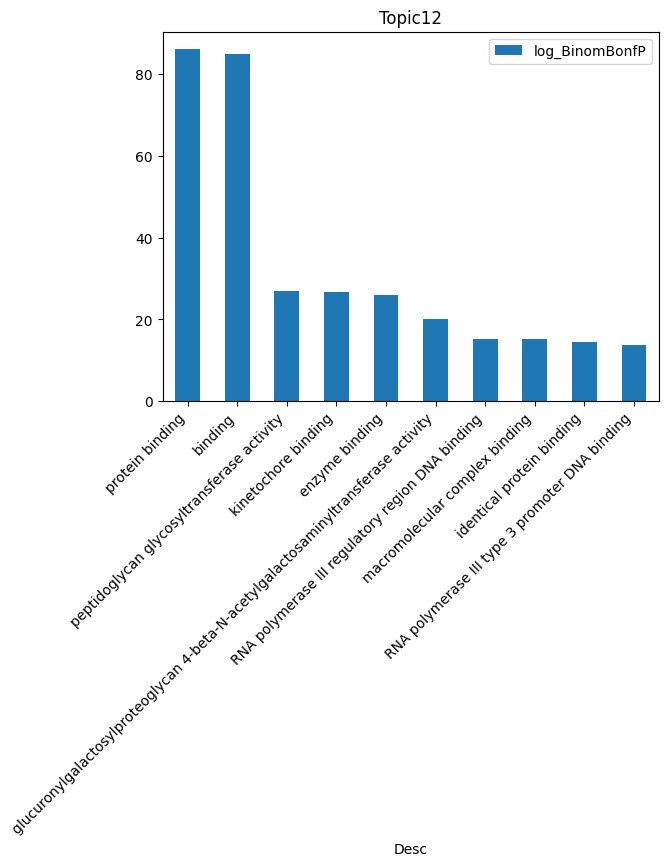



Topic13


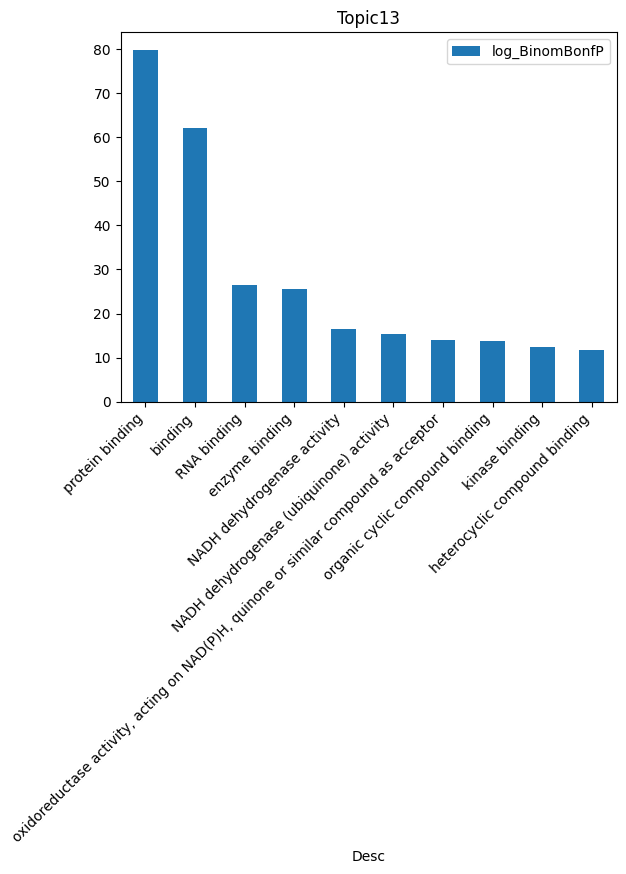



Topic14


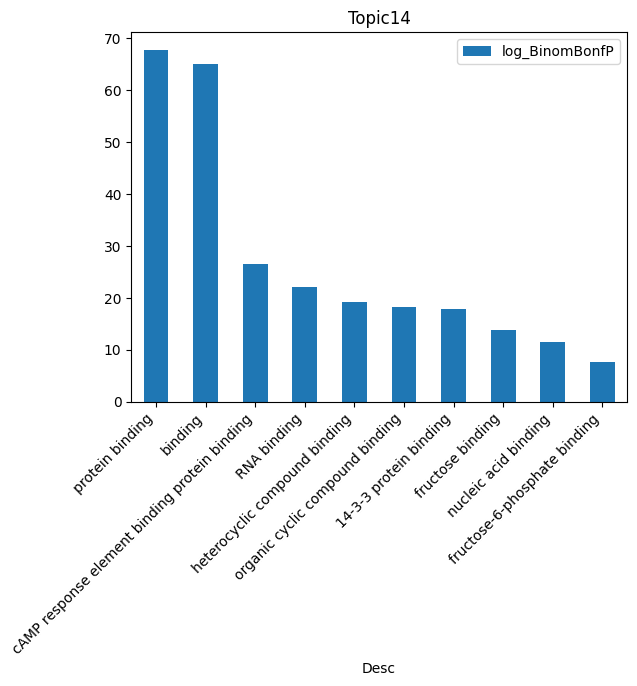



Topic15


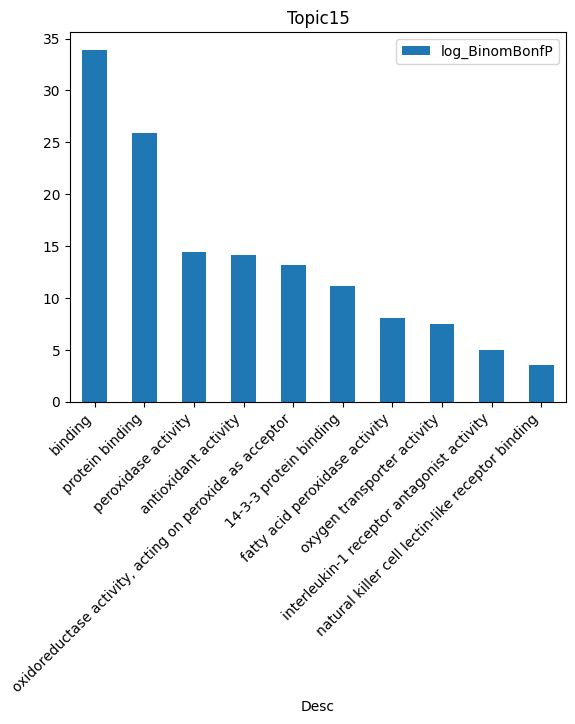



Topic16


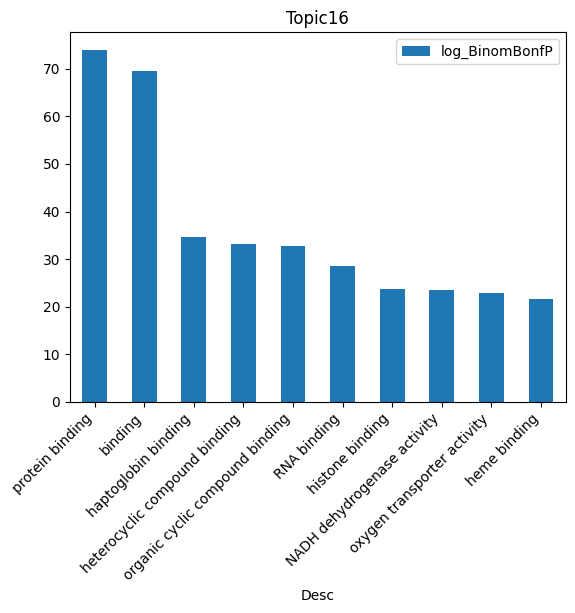



Topic17


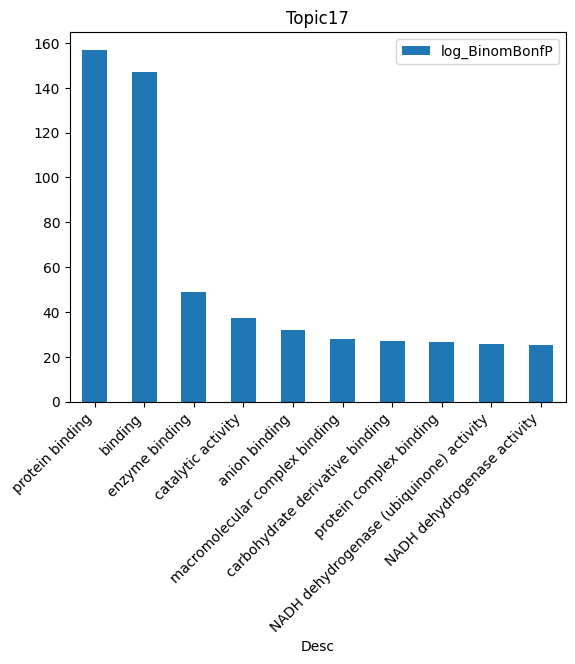



Topic18


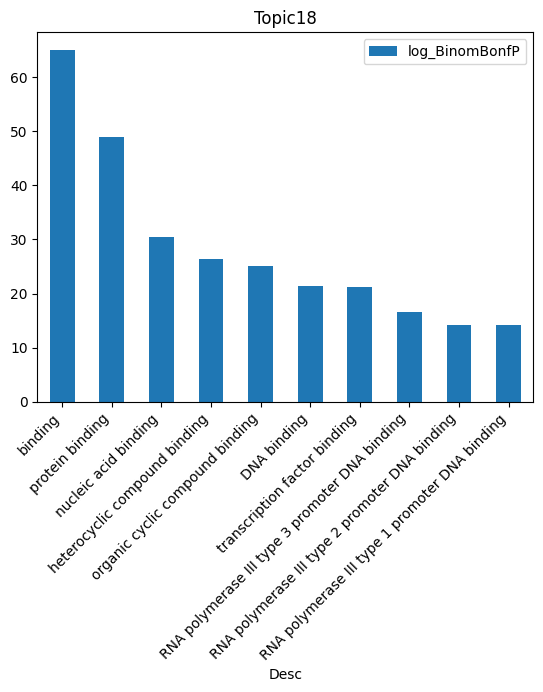



Topic19


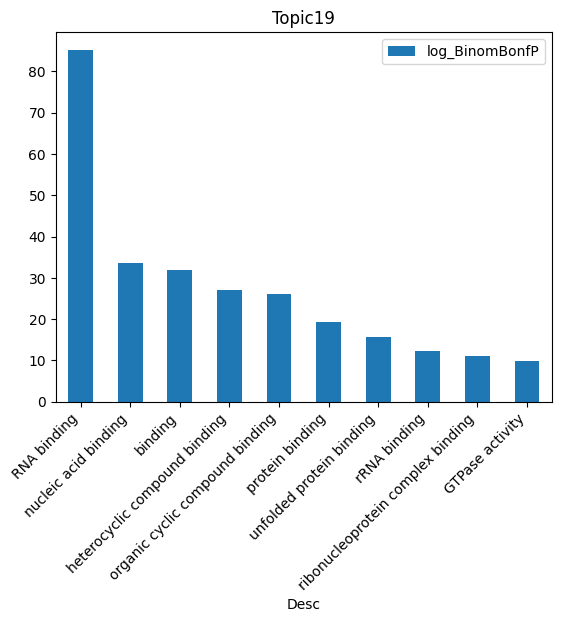



Topic20


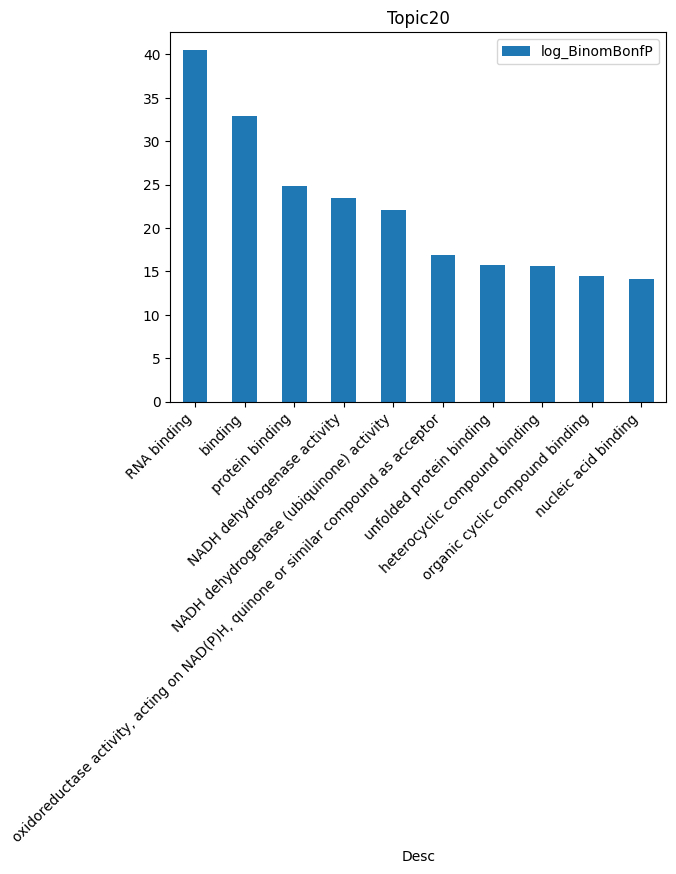



Topic21


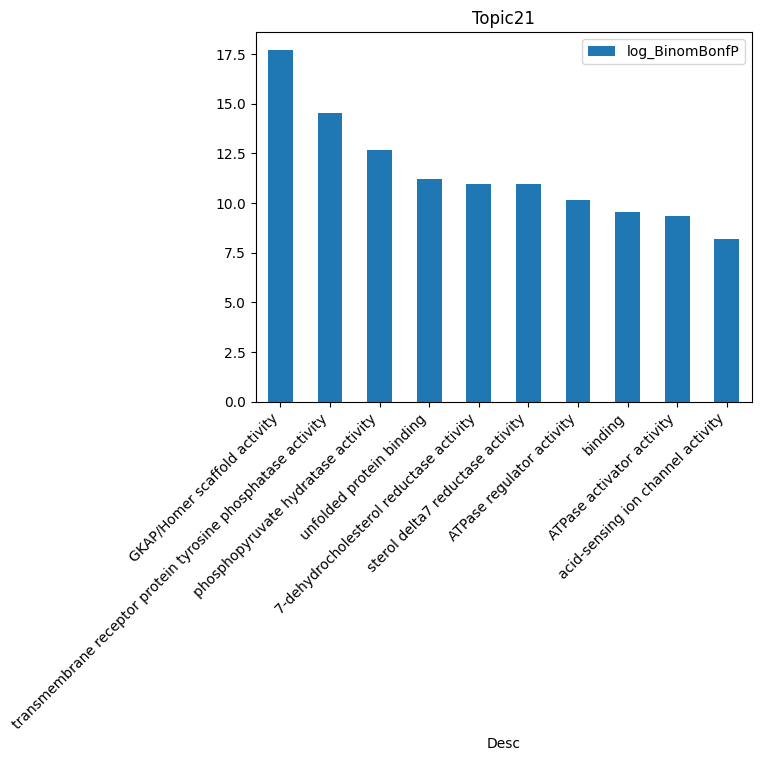



Topic22


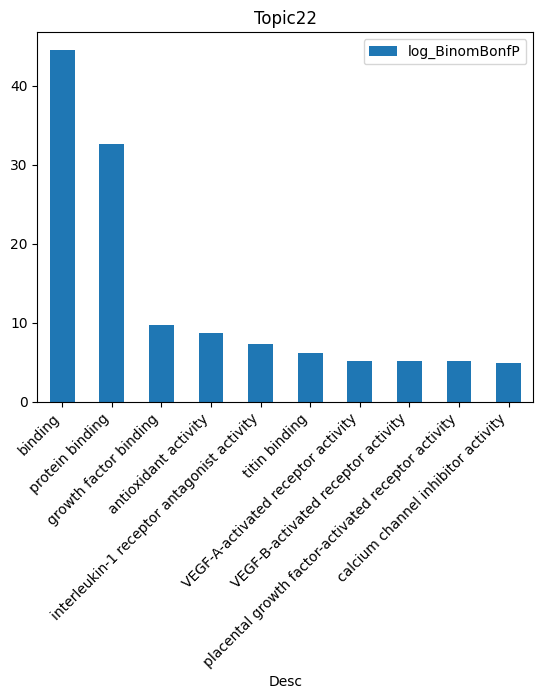



Topic23


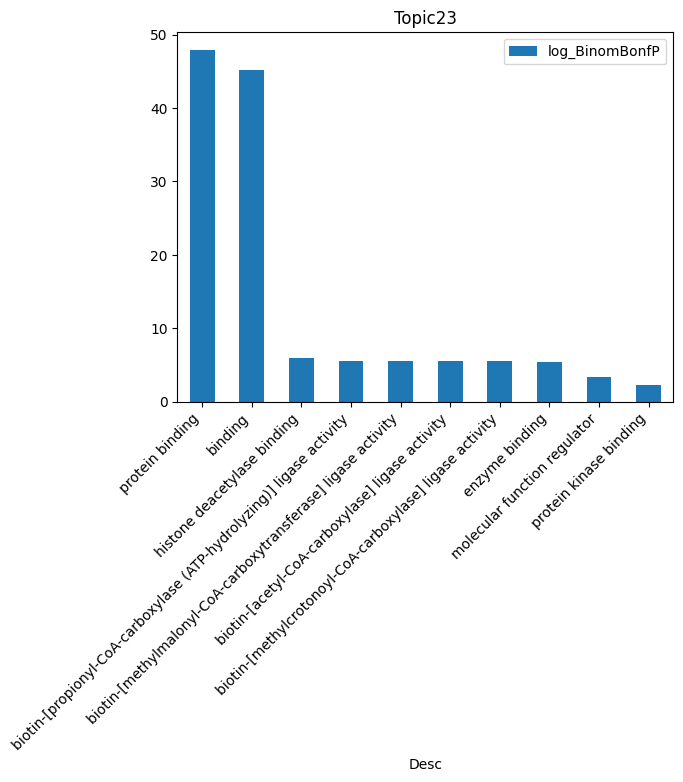



Topic24


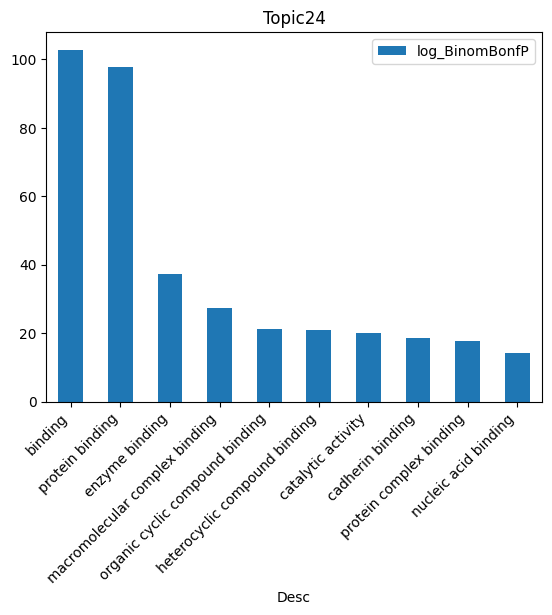



Topic25


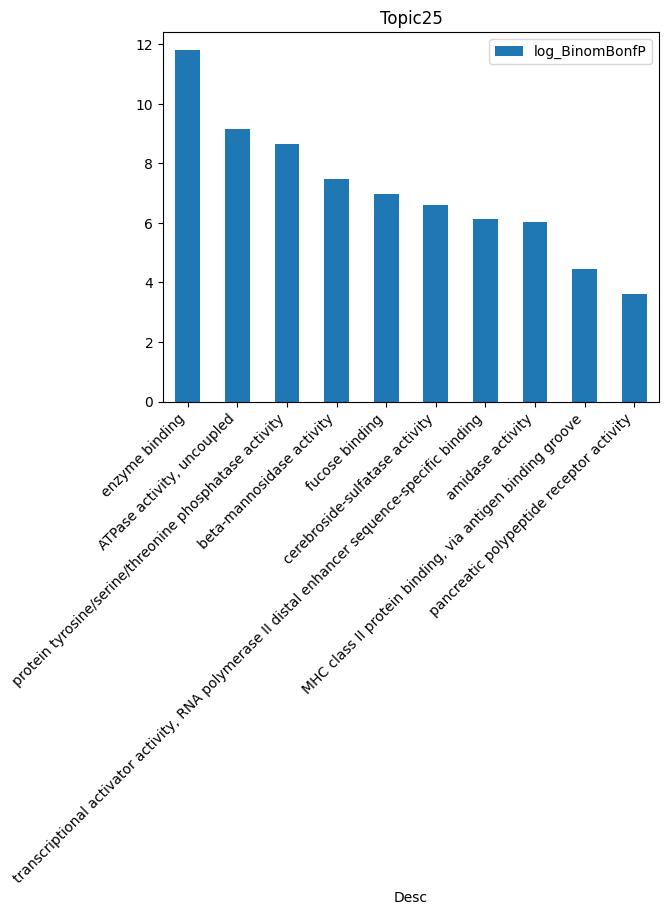



Topic26


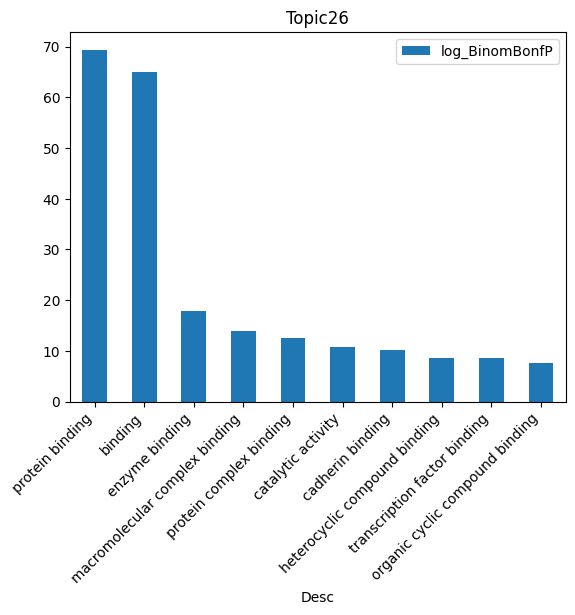



Topic27


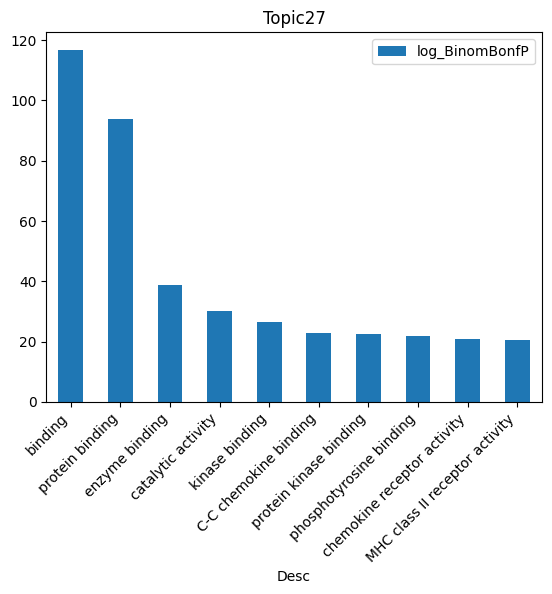



Topic28


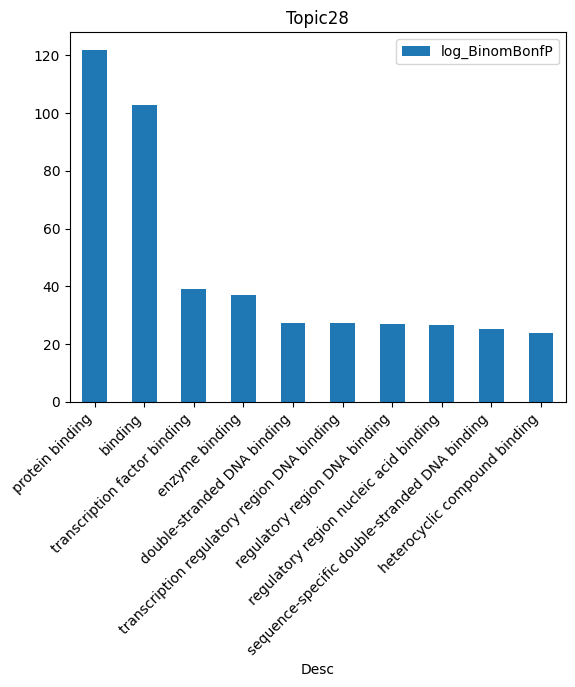



Topic29


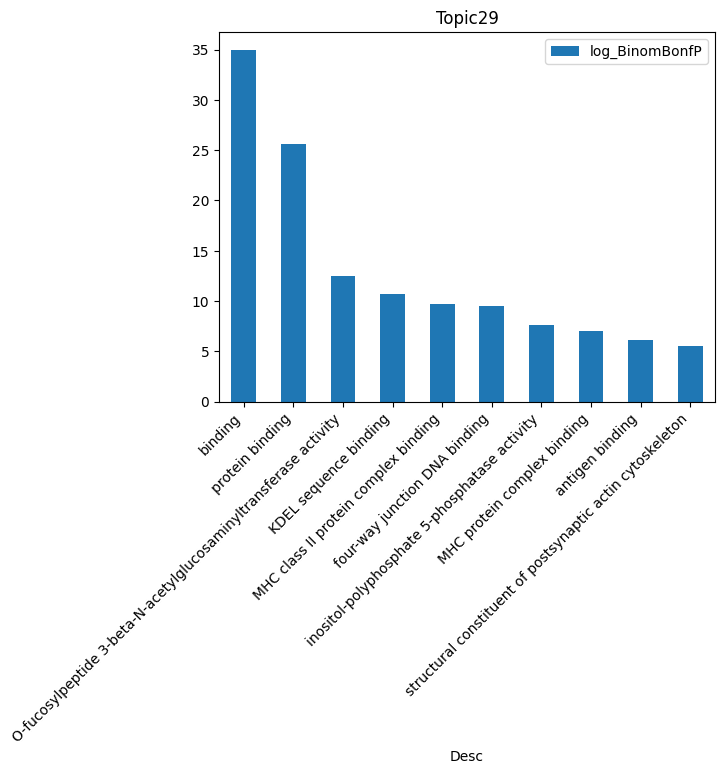



Topic30


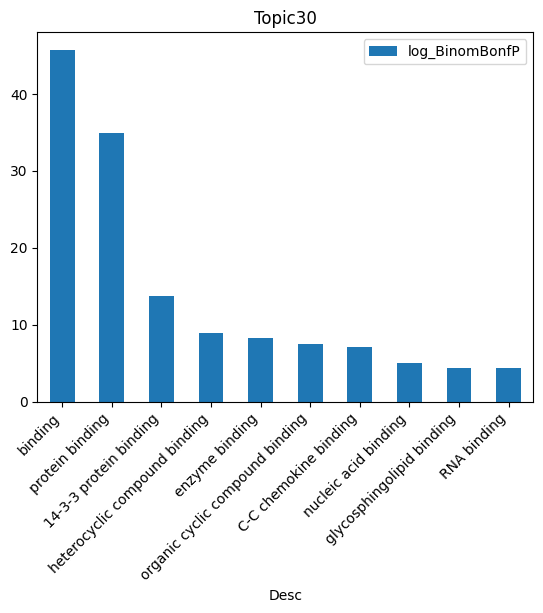

In [83]:
for i in region_bin_topics_top_3k.keys():
    print(i)
    df = result[i]['GO Molecular Function']
    [x for x in df.Desc.tolist() if x not in df.Desc.tolist()]
    df['log_BinomBonfP'] =  np.abs(np.log(df['BinomBonfP'].astype(float)))
    df.head(10).plot.bar(x = 'Desc', y = 'log_BinomBonfP', rot=0)
    plt.title(i)
    plt.xticks(rotation = 45, ha='right')
    plt.show()
    print("\n")


In [57]:
df12 = result['Topic27']['GO Biological Process']
df29 = result['Topic27']['GO Molecular Function']

[x for x in df12.Desc.tolist() if x not in df12.Desc.tolist()]
#[x for x in df29.Desc.tolist() if x not in df29.Desc.tolist()]

#df12.to_csv(outdir + "topic_binarization/GO_analysis/topic12_GO.csv", sep = "\t")
#df32.to_csv(outdir + "topic_binarization/GO_analysis/topic32_GO.csv", sep = "\t")

df29.head(60)


Ontology          ID  \
0   GO Molecular Function  GO:0005488   
1   GO Molecular Function  GO:0005515   
2   GO Molecular Function  GO:0019899   
3   GO Molecular Function  GO:0003824   
4   GO Molecular Function  GO:0019900   
5   GO Molecular Function  GO:0019957   
6   GO Molecular Function  GO:0019901   
7   GO Molecular Function  GO:0001784   
8   GO Molecular Function  GO:0004950   
9   GO Molecular Function  GO:0032395   
10  GO Molecular Function  GO:0045309   
11  GO Molecular Function  GO:0008137   
12  GO Molecular Function  GO:0003954   
13  GO Molecular Function  GO:0032403   
14  GO Molecular Function  GO:0019956   
15  GO Molecular Function  GO:0017124   
16  GO Molecular Function  GO:0051219   
17  GO Molecular Function  GO:0003823   
18  GO Molecular Function  GO:0016651   
19  GO Molecular Function  GO:0097159   
20  GO Molecular Function  GO:0004715   
21  GO Molecular Function  GO:0023023   
22  GO Molecular Function  GO:0005519   
23  GO Molecular Function  GO:1901363   
24  GO Molecular Function  GO:0023026   
25  GO Molecular Function  GO:0016655   
26  GO Molecular Function  GO:0004896   
27  GO Molecular Function  GO:0016494   
28  GO Molecular Function  GO:0019904   
29  GO Molecular Function  GO:0043208   
30  GO Molecular Function  GO:0035591   
31  GO Molecular Function  GO:0031682   
32  GO Molecular Function  GO:0044877   
33  GO Molecular Function  GO:0005085   
34  GO Molecular Function  GO:0031996   
35  GO Molecular Function  GO:0008289   
36  GO Molecular Function  GO:0008553   
37  GO Molecular Function  GO:0016493   
38  GO Molecular Function  GO:0016603   
39  GO Molecular Function  GO:0005138   
40  GO Molecular Function  GO:0046625   
41  GO Molecular Function  GO:0016740   
42  GO Molecular Function  GO:0042605   
43  GO Molecular Function  GO:0003924   
44  GO Molecular Function  GO:0051861   
45  GO Molecular Function  GO:0005070   
46  GO Molecular Function  GO:0016787   
47  GO Molecular Function  GO:0000980   
48  GO Molecular Function  GO:0047127   
49  GO Molecular Function  GO:0044714   
50  GO Molecular Function  GO:0047693   
51  GO Molecular Function  GO:0044713   
52  GO Molecular Function  GO:0036219   
53  GO Molecular Function  GO:0003854   
54  GO Molecular Function  GO:0004674   
55  GO Molecular Function  GO:0046872   
56  GO Molecular Function  GO:0000166   
57  GO Molecular Function  GO:1901265   
58  GO Molecular Function  GO:0015078   
59  GO Molecular Function  GO:0043167   

                                                 Desc BinomRank        BinomP  \
0                                             binding         1  4.640754e-55   
1                                     protein binding         2  4.875831e-45   
2                                      enzyme binding         3  3.989955e-21   
3                                  catalytic activity         4  1.795009e-17   
4                                      kinase binding         5  6.720826e-16   
5                               C-C chemokine binding         6  2.487565e-14   
6                              protein kinase binding         7  4.691192e-14   
7                             phosphotyrosine binding         8  6.852044e-14   
8                         chemokine receptor activity         9  2.398996e-13   
9                      MHC class II receptor activity        10  3.268785e-13   
10          protein phosphorylated amino acid binding        11  9.627474e-13   
11           NADH dehydrogenase (ubiquinone) activity        12  1.922686e-12   
12                        NADH dehydrogenase activity        13  2.784106e-12   
13                            protein complex binding        14  2.098801e-11   
14                                  chemokine binding        15  2.748073e-11   
15                                 SH3 domain binding        16  3.006104e-11   
16                             phosphoprotein binding        17  3.378584e-11   
17                                    antigen binding    

In [56]:
result['Topic27']

{'Mouse Phenotype':             Ontology          ID  \
 0    Mouse Phenotype  MP:0002421   
 1    Mouse Phenotype  MP:0001819   
 2    Mouse Phenotype  MP:0002442   
 3    Mouse Phenotype  MP:0002420   
 4    Mouse Phenotype  MP:0012382   
 ..               ...         ...   
 495  Mouse Phenotype  MP:0004801   
 496  Mouse Phenotype  MP:0003250   
 497  Mouse Phenotype  MP:0012186   
 498  Mouse Phenotype  MP:0004796   
 499  Mouse Phenotype  MP:0010770   
 
                                                   Desc BinomRank  \
 0                      abnormal cell-mediated immunity         1   
 1                      abnormal immune cell physiology         2   
 2                        abnormal leukocyte physiology         3   
 3                           abnormal adaptive immunity         4   
 4                       abnormal blood cell physiology         5   
 ..                                                 ...       ...   
 495  increased susceptibility to systemic lupus ery

In [ ]:
pyGREAT?

# DAR

In [ ]:
from pycisTopic.diff_features import (
    impute_accessibility,
    normalize_scores,
    find_highly_variable_features,
    find_diff_features
)
import numpy as np

In [ ]:
imputed_acc_obj = impute_accessibility(
    cistopic_obj,
    selected_cells=None,
    selected_regions=None,
    scale_factor=10**6
)

In [ ]:
normalized_imputed_acc_obj = normalize_scores(imputed_acc_obj, scale_factor=10**4)

In [ ]:
variable_regions = find_highly_variable_features(
    normalized_imputed_acc_obj,
    min_disp = 0.05,
    min_mean = 0.0125,
    max_mean = 3,
    max_disp = np.inf,
    n_bins=20,
    n_top_features=None,
    plot=True
)

In [ ]:
len(variable_regions)

In [ ]:
markers_dict= find_diff_features(
    cistopic_obj,
    imputed_acc_obj,
    variable='cell_type_all',
    var_features=variable_regions,
    contrasts=None,
    adjpval_thr=0.05,
    log2fc_thr=np.log2(1.5),
    n_cpu=5,
    _temp_dir='/scratch/leuven/338/vsc33857/ray_spill',
    split_pattern = '-'
)

In [ ]:
from pycisTopic.clust_vis import plot_imputed_features

In [ ]:
cistopic_obj.cell_data.cell_type_all.value_counts()

In [ ]:
plot_imputed_features(
    cistopic_obj,
    reduction_name='UMAP',
    imputed_data=imputed_acc_obj,
    features=[markers_dict[x].index.tolist()[0] for x in ['Pro-B_cells_D0','Pro-B_cells_Q1','Pro-B_cells_Q2', 'Pro-B_cells_Q3', 'CD16pos_NK_cells', 'Tcm_Naive_helper_T_cells', 'Tem_Trm_cytotoxic_T_cells',
                                                         'Classical_monocytes','Naive_B_cells']],
    scale=False,
    num_columns=4
)

In [ ]:
print("Number of DARs found:")
print("---------------------")
for x in markers_dict:
    print(f"  {x}: {len(markers_dict[x])}")

In [ ]:
# save region sets
os.makedirs(os.path.join(out_dir, "region_sets"), exist_ok = True)
os.makedirs(os.path.join(out_dir, "region_sets", "Topics_otsu"), exist_ok = True)
os.makedirs(os.path.join(out_dir, "region_sets", "Topics_top_3k"), exist_ok = True)
os.makedirs(os.path.join(out_dir, "region_sets", "DARs_cell_type"), exist_ok = True)

In [ ]:
from pycisTopic.utils import region_names_to_coordinates

In [ ]:
for topic in region_bin_topics_otsu:
    region_names_to_coordinates(
        region_bin_topics_otsu[topic].index
    ).sort_values(
        ["Chromosome", "Start", "End"]
    ).to_csv(
        os.path.join(out_dir, "region_sets", "Topics_otsu", f"{topic}.bed"),
        sep = "\t",
        header = False, index = False
    )

In [ ]:
for topic in region_bin_topics_top_3k:
    region_names_to_coordinates(
        region_bin_topics_top_3k[topic].index
    ).sort_values(
        ["Chromosome", "Start", "End"]
    ).to_csv(
        os.path.join(out_dir, "region_sets", "Topics_top_3k", f"{topic}.bed"),
        sep = "\t",
        header = False, index = False
    )

In [ ]:
for cell_type in markers_dict:
    region_names_to_coordinates(
        markers_dict[cell_type].index
    ).sort_values(
        ["Chromosome", "Start", "End"]
    ).to_csv(
        os.path.join(out_dir, "region_sets", "DARs_cell_type", f"{cell_type}.bed"),
        sep = "\t",
        header = False, index = False
    )

# Gene activity

In [ ]:
import pyranges as pr
from pycisTopic.gene_activity import get_gene_activity

In [ ]:
chromsizes = pd.read_table(os.path.join(out_dir, "qc", "hg38.chrom_sizes_and_alias.tsv"))
chromsizes

In [ ]:
chromsizes.rename({"# ucsc": "Chromosome", "length": "End"}, axis = 1, inplace = True)
chromsizes["Start"] = 0
chromsizes = pr.PyRanges(chromsizes[["Chromosome", "Start", "End"]])

In [ ]:
pr_annotation = pd.read_table(
        os.path.join(out_dir, "qc", "tss.bed")
    ).rename(
        {"Name": "Gene", "# Chromosome": "Chromosome"}, axis = 1)
pr_annotation["Transcription_Start_Site"] = pr_annotation["Start"]
pr_annotation = pr.PyRanges(pr_annotation)
pr_annotation

In [ ]:
gene_act, weigths = get_gene_activity(
    imputed_acc_obj,
    pr_annotation,
    chromsizes,
    use_gene_boundaries=True, # Whether to use the whole search space or stop when encountering another gene
    upstream=[1000, 100000], # Search space upstream. The minimum means that even if there is a gene right next to it
                             # these bp will be taken (1kbp here)
    downstream=[1000,100000], # Search space downstream
    distance_weight=True, # Whether to add a distance weight (an exponential function, the weight will decrease with distance)
    decay_rate=1, # Exponent for the distance exponential funciton (the higher the faster will be the decrease)
    extend_gene_body_upstream=10000, # Number of bp upstream immune to the distance weight (their value will be maximum for
                          #this weight)
    extend_gene_body_downstream=500, # Number of bp downstream immune to the distance weight
    gene_size_weight=False, # Whether to add a weights based on the length of the gene
    gene_size_scale_factor='median', # Dividend to calculate the gene size weigth. Default is the median value of all genes
                          #in the genome
    remove_promoters=False, # Whether to remove promoters when computing gene activity scores
    average_scores=True, # Whether to divide by the total number of region assigned to a gene when calculating the gene
                          #activity score
    scale_factor=1, # Value to multiply for the final gene activity matrix
    extend_tss=[10,10], # Space to consider a promoter
    gini_weight = True, # Whether to add a gini index weigth. The more unique the region is, the higher this weight will be
    return_weights= True, # Whether to return the final weights
    project='Gene_activity') # Project name for the gene activity object

In [ ]:
DAG_markers_dict= find_diff_features(
    cistopic_obj,
    gene_act,
    variable='cell_type_all',
    var_features=None,
    contrasts=None,
    adjpval_thr=0.05,
    log2fc_thr=np.log2(1.5),
    n_cpu=5,
    _temp_dir='/scratch/leuven/338/vsc33857/ray_spill',
    split_pattern = '-')

In [ ]:
# cell typist
plot_imputed_features(
    cistopic_obj,
    reduction_name='UMAP',
    imputed_data=gene_act,
    features=[
        'PRDX2','KCNH2','GYPA', # Mid erythroid
        'GNLY','FCGR3A','NKG7', # CD16+ NK cells
        'TCL1A', # naive B cells
        'MME','DNTT','IGLL1', # Pro-B cells
        'CCR7','SELL','CD4', # Tcm/Naive helper T cells
        'GZMK','CD8A','CCL5'], # Tem/Trm cytotoxic T cells
    scale=True,
    num_columns=4
)


In [ ]:
plot_imputed_features(
    cistopic_obj,
    reduction_name='UMAP',
    imputed_data=gene_act,
    features=['CD14', # CD14 mono
              'IL7R', # CD4
              'MS4A1', # B
              'CD8A',  #CD8+T
              'NKG7','GNLY', #NK
              'CD19'], #CD19 B-all
    scale=True,
    num_columns=4
)

In [ ]:
# cell cyccle
plot_imputed_features(
    cistopic_obj,
    reduction_name='UMAP',
    imputed_data=gene_act,
    features=['CDK1',
              'CCNA1','CCNA2',
              'CCNB1','CCNB2',
              'CCND1','CCND2',
              'CCNE2','CCNE1'],
    scale=True,
    num_columns=4
)

In [ ]:
plot_metadata(
    cistopic_obj,
    reduction_name='UMAP',
    variables=['cell_type_all'],
    target='cell', num_columns=4,
    text_size=10,
    dot_size=5)

In [ ]:
print("Number of DAGs found:")
print("---------------------")
for x in markers_dict:
    print(f"  {x}: {len(DAG_markers_dict[x])}")

In [ ]:
pickle.dump(
    cistopic_obj,
    open(os.path.join(out_dir, "cistopic_obj.pkl"), "wb")
)

In [ ]:
import scanpy as sc
rna = sc.read_h5ad("/lustre1/project/stg_00096/home/projects/2023_Cools_B-ALL/concatenated_adata_log_pca_celltypist_23012025.h5ad")

In [ ]:
rna

In [ ]:
sc.pl.umap(rna, color = 'celltypist_cell_label_fine')
sc.pl.umap(rna, color = ['CD19','MALAT1'])

In [ ]:
cistopic_obj.cell_data.sample_id.value_counts()

In [ ]:
cistopic_obj.cell_data.cell_type_all.value_counts()

In [ ]:
grouped_df = cistopic_obj.cell_data.groupby(['cell_type_all', 'sample_id']).size().unstack()
grouped_df = grouped_df.div(grouped_df.sum(axis=1), axis=0)

# Create a colormap with up to 10 distinct colors
#colors = list(mcolors.TABLEAU_COLORS.values()) + list(mcolors.CSS4_COLORS.values())
#colors = colors[:10]  # Ensure we only take the first 10 colors

# Create a single plot
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plotting the stacked bar plot
grouped_df.plot(kind='bar', stacked=True, width=0.8, ax=ax1)

# Setting labels and title for the bar plot
ax1.set_xlabel('')
ax1.set_ylabel('Cell type Ratio')
ax1.set_title('Cell Type Distribution')
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax1.grid(False)

# Display the plot
plt.tight_layout()
plt.show()

In [ ]:
grouped_df = cistopic_obj.cell_data.groupby([ 'sample_id','cell_type_all']).size().unstack()
grouped_df = grouped_df.div(grouped_df.sum(axis=1), axis=0)

# Create a colormap with up to 10 distinct colors
#colors = list(mcolors.TABLEAU_COLORS.values()) + list(mcolors.CSS4_COLORS.values())
#colors = colors[:10]  # Ensure we only take the first 10 colors

# Create a single plot
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plotting the stacked bar plot
grouped_df.plot(kind='bar', stacked=True, width=0.8, ax=ax1)

# Setting labels and title for the bar plot
ax1.set_xlabel('')
ax1.set_ylabel('Cell type Ratio')
ax1.set_title('Cell Type Distribution')
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax1.grid(False)

# Display the plot
plt.tight_layout()
plt.show()

In [ ]:
rna.obs['sample'].value_counts()

In [ ]:
cistopic_obj.cell_data

## Compare with previous ATAC run

In [ ]:
import pickle
file_path = "/staging/leuven/stg_00096/home/projects/2023_Cools_B-ALL/atac/outs/cistopic_obj.pkl"
with open(file_path, 'rb') as file:
    cistopic_obj_old = pickle.load(file)

print(cistopic_obj_old)

In [ ]:
cistopic_obj_old.cell_data

In [ ]:
cistopic_obj.cell_data

In [ ]:
merged_df = cistopic_obj.cell_data.merge(cistopic_obj_old.cell_data, left_index=True, right_index=True)


In [ ]:
merged_df

In [ ]:
merged_df[['cell_type_all_y','cell_type_all_x']].value_counts()

In [ ]:
import seaborn as sns
value_counts = merged_df[['cell_type_all_y', 'cell_type_all_x']].value_counts().reset_index(name='count')
value_counts['norm'] = (value_counts['count']/value_counts['count'].sum()) * 100

heatmap_data = value_counts.pivot('cell_type_all_y', 'cell_type_all_x', 'norm').fillna(0)

# Create the heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=False, fmt='g', cmap='viridis')
plt.xlabel('new_annotation')
plt.ylabel('old_annotation')

In [ ]:
value_counts['count'].sum()

In [ ]:
merged_df = cistopic_obj.cell_data.merge(cistopic_obj_old.cell_data, left_index=True, right_index=True,  how='outer', indicator=True)
#merged_df = df1.merge(df2, left_index=True, right_index=True, how='outer', indicator=True)

# Filter the original DataFrames to find the rows that are not in the merged DataFrame
not_in_df1 = merged_df[merged_df['_merge'] == 'right_only']
not_in_df2 = merged_df[merged_df['_merge'] == 'left_only']

In [ ]:
not_in_df1

In [ ]:
not_in_df2

In [ ]:
not_in_df2.cell_type_all_y.value_counts()

In [ ]:
not_in_df2.cell_type_all_x.value_counts()

## Save object to anndata 

In [ ]:
import scanpy as sc
#X = contains gene expression data with cells as rows and genes as columns
#X in ATAC = cistopic_obj.binary_matrix.T = matrix containing cell names as column names, regions as row names and whether regions as accessible
#var: Each row in the var DataFrame corresponds to a variable (gene or peak), and the columns are used for storing various types of annotations or metadata about these variables
#var in ATAC: region_data (with region as indexes and attributes as columns)
ad = sc.AnnData(
    X = cistopic_obj.binary_matrix.T,
    obs = cistopic_obj.cell_data,
    var = cistopic_obj.region_data,
    obsm = {
	embedding: cistopic_obj.projections["cell"][embedding].values
        for embedding in cistopic_obj.projections["cell"].keys()}
)

In [ ]:
ad

In [ ]:
ad.obsm = {key.lower(): value for key, value in ad.obsm.items()} # put obsm keys to lower to be functional in scanpy

In [ ]:
ad

In [ ]:
sc.pl.umap(ad, color ="cell_type_all")

In [ ]:
ad.obs

In [ ]:
ad.obs.dtypes

In [ ]:
ad.obs = ad.obs.apply(lambda col: col.astype(float) if col.dtype == 'object' else col)

In [ ]:
ad.obs

In [ ]:
import datetime
date = datetime.datetime.now().strftime('%Y%m%d')
ad.write(f'./outs/{date}_atac_ball_processed.h5ad')

In [ ]:
pip list